# When you ask disgruntled, I say how high.
## Analysing Company Reviews.
### Chapter B1: Analysing a single company
<br><br>
<b>Project Goal:</b> The automatic analysis of employer evaluations. Although the code shall be scalable and flexible, it shall at this moment focuses on:<br>
- One Company, and<br>
- German Language Reviews<br>
- The Feature "Recomandation".<br><br>

<b>Strategic Goal:</b> The strategic goal pursued by this Project is to:
- excercise, and<br>
- flex<br>

my Data Science muscles.<br>

<span style="color: red;">
<b>Next Steps</b><br>
- Get Peer Feedback<br>
- Implement the three laws of robotics<br>
</span>

## 00 : Set Up Workshop

### 00-01 : Import Libraries

In [1]:
# Counter of Words
from collections import Counter
# Vectors, Matrices and thier Math
import numpy as np
# DataFrames
import pandas as pd
# Timestamps
import datetime

# Regular Expressions
import re
# Natural Language Handling
import nltk
# Stopwords
from nltk.corpus import stopwords
# Tokenize Words
from nltk import word_tokenize
# Identify Language
from langdetect import detect

# Fancy Visualizations
import seaborn as sns
# Basic Visualizations
import matplotlib.pyplot as plt
# Combining Subplots
from matplotlib.gridspec import GridSpec

### 00-02 : Get additional Data for Libraries

In [2]:
# Download Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrmnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 00-03 : Settings

<span style="color: red;">
<b>Next Steps</b><br>
- attach colorsheme to Data (ALWAYS: recommended = green)<br>
- Visualization Sizes (plt.figure(figsize=(10,10)) ?)<br>
</span>

In [3]:
# Define Color Scheme
flatui = ["lightgreen", 'tomato']
knncol = sns.color_palette(flatui)
# Set Graph Size
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
# Relevancy Threshold
rel_threshold = 0.45
# Pie Chart to Small
too_small    = 0.05
# Minimum Number of Words
min_words    = 75

In [5]:
# Define Target
target = 'deutsche-bundeswehr'

## 01 : Data Mining
<i> The Data Aquisition is being done in a different Notebook. The results (in a pickle format) are just imported here.</i>

In [6]:
df = pd.read_pickle(str('./AA-DataMining/reviews_'+target+'.pkl'))
df.head()

,headline,time,avg_score,recom,status,depar,Gut am Arbeitgeber finde ich_T,Schlecht am Arbeitgeber finde ich_T,Verbesserungsvorschläge_T,Arbeitsatmosphäre_T,...,Was macht dein Arbeitgeber in Corona-Zeiten nicht gut?_T,Was sollte dein Unternehmen in Corona-Zeiten (anders) machen?_T,Die Ausbilder_T,Spaßfaktor_T,Arbeitszeiten_T,Aufgaben/Tätigkeiten_T,Variation_T,Karrierechancen_T,Ausbildungsvergütung_T,Respekt_T
0,Grausig,2020-07-30,2.2,Nicht empfohlen,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Administration / Verwaltung bei...,"Kantine vor Ort, Parkmöglichkeiten, freitags w...","Zu viel Personal, ABMs, keine sinnvollen Tätig...","Weniger Personal, straffer Abläufe, gebildetes...","Kein Lob, keine Struktur, kein Wissen",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beamter im höheren nichttechnischen Dienst,2020-07-27,5.0,Empfohlen,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Interessante Aufgaben bei sehr guter Work-Life...,NaN,NaN,Zumindest in unserem Bereich super. Ich habe v...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Top Arbeitgeber,2020-07-17,4.8,Empfohlen,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung im Bereich IT ...,NaN,NaN,NaN,"Es steht und fällt mit den Kollegen , prinzipi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arbeitgeber mit Zukunft,2020-07-10,4.8,Empfohlen,Ex-Angestellte/r oder Arbeiter/in,Hat bei Bundeswehr - Bundesamt für das Persona...,vieles,Gwdl abgeschafft,den Satz das man sich nach Ausland verpflichte...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pro und Contra Arbeitgeber Bundeswehr,2020-07-08,2.8,Nicht empfohlen,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung bei Bundeswehr...,"Vielseitigkeit, Kameradschaft, man kommt viel ...",Siehe Verbesserungsvorschläge für den Arbeitge...,"Mehr Ehrlichkeit bei / mit Bewerbern, respektv...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 02 : Data Cleaning
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Move this to 01-DataMining<br>
</span>

### 02-01 : Extract additional Information from Features
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Change into categorical feature if applicable<br>
</span>

In [7]:
#https://pbpython.com/categorical-encoding.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
#https://www.datacamp.com/community/tutorials/categorical-data

#### 02-01-01 : Status -> Current or Former Employee

In [8]:
df["ex"] = df.status.str.contains("Ex-", regex = False)
df["status"] = df.status.str.replace("Ex-", "")

#### 02-01-02 : Department -> Location, Department, Division, Time, Vocational Training
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Add to Data Reconaissance<br>
- Remove the \n earlier<br>
- Polish and Comment Code<br>
- Work with Regex/ str.split to make this safe<br>
- Extract Time of Review in 02-02, use here to get time<br>
- Make the "save_"-functions obsolete by finding more elagant version<br>
- Sort Feeatures<br>
</span>

In [9]:
def save_check(sublist,stringz):
    try:
        return(sublist.index(stringz))+1
    except:
        return(None)
    
def save_take(sublist,number):
    if number != None:
        return(sublist[number])
    else:
        return(None)
    
def save_split(sublist):   
    if type(sublist) != float:
        return(re.split(r'( zum/zur )|( bis )|( bei )|( in )|( im Bereich )', sublist))
    else:
        return('')
    
def save_replace(sublist, string):
    if type(sublist) == str:
        return(sublist.replace(string,''))
    else:
        return('')    

In [10]:
# Remove \n
df.depar = df.depar.str.replace('\n','')

In [11]:
# Tokenize IAW results from Data Reconaissance
deptoken = [save_split(idx) for idx in df.depar]
# Remove Nones
deptoken = [[i for i in sublist if i]
         for sublist in deptoken]

In [12]:
# Extract Location (after the ' in ' bracket)
delta    = [save_check(sublist,' in ') for sublist in deptoken]
location = [save_take(deptoken[idx], delta[idx]) for idx in range(0, len(df.depar))]
# Remove everything that is not the location
location = [save_replace(idx," gearbeitet.") for idx in location]
location = [save_replace(idx," abgeschlossen.") for idx in location]
location = [save_replace(idx," absolviert.") for idx in location]
# Add to Main DataFrame
df['location'] = location

In [13]:
# Extract Department
delta                  = [save_check(sublist,' im Bereich ') for sublist in deptoken]
department             = [save_take(deptoken[idx], delta[idx]) for idx in range(0, len(df.depar))]
df["department"] = department

In [14]:
# Extract Division (after the ' bei ' bracket)
delta                = [save_check(sublist,' bei ') for sublist in deptoken]
division             = [save_take(deptoken[idx], delta[idx]) for idx in range(0, len(df.depar))]
df['division'] = division

In [15]:
# Extract Department
delta = [save_check(sublist,' im Bereich ') for sublist in deptoken]
department = [save_take(deptoken[idx], delta[idx]) for idx in range(0, len(df.depar))]
df["department"] = department

In [16]:
# Drop the now obsulete Feature
df.drop("depar", axis = 1, inplace = True)

#### 02-01-03 : Review-Texts -> Language
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Polish this<br>
- What happens if all values are missing?<br>
- text_feats earlier<br>
</span>

In [17]:
def safe_detect(string):
    try:
        return(detect(string))
    except:
        return('UKN')
def remove_floats(texts):
    col = []
    for idx in texts: 
        try: 
            float(idx) 
        except ValueError: 
            col.append(idx)
    return(col)   

In [18]:
# All text Features
text_feats = ['headline']
text_feats += [idx for idx in df.columns if '_T' in idx]
# Add all written text
text = [[df[feat][review] for feat in text_feats
if df[feat][review] != 'nan'] for review in range(0,df.shape[0])] 

In [19]:
# Remove Nans
text = [remove_floats(idx) for idx in text]

In [20]:
# Join all text
text = [" ".join(idx) for idx in text]

In [21]:
# Add to DataFrame
df['text'] = text
# Delete '\n'
df['text'] = df['text'].str.replace('\n',' ')

In [22]:
df['language'] = [safe_detect(idx) for idx in df.text]

### 02-04 : Drop irrelevant Data
<i> Since this project focuses on the recommendation, all observations without one will be dropped.</i>

In [23]:
df.drop(df[df.recom.isna()].index, inplace = True)
df = df.reset_index(drop = True)

<b>Warning!</b> Once the the Scope of this Project is extended and these observations are not dropped anymore - some code needs to be overhauled. At earlier times, when the platform did not have the recommendation feature, the ratings where tagged differently. The current choice of scope convinently circumvents this issue.</i>

## 03 : Analysis
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Extract Time Feature<br>
- Make, and write down, conclusions<br>
- unify design/ colorscheme<br>
- Autoremove irellevant Categories<br>
</span>
<br>
<i> Focus of this Project is the reviewer's recommendation. Every piece of Data is seen through this lense therefore. The analysis of each single features by itself is therfore skipped. Exception is the Guest of Honor itself: The Recommendation:</i> 

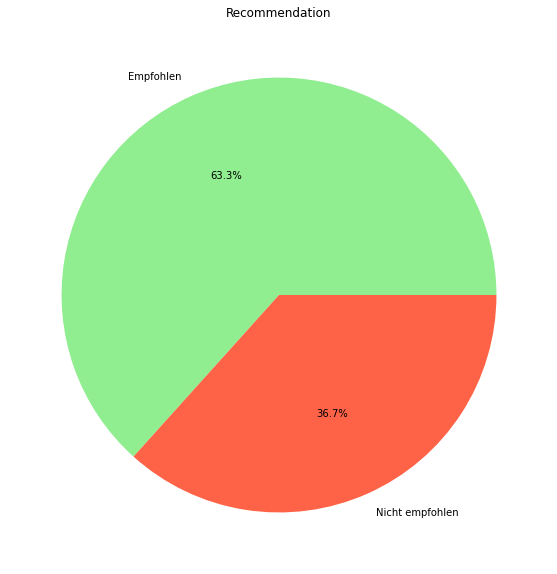

In [24]:
plt.pie(df.recom.value_counts(),labels = df.recom.value_counts().index, autopct='%1.1f%%', colors = flatui)
plt.title("Recommendation")
plt.show()

### 03-01: Time-Series Analysis
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Auto ID significant Timewindows<br>
- Weekday Analysis<br>
- Polish Code<br>
- Comment Code<br>
</span>

#### 03-01-00 : Groundwork

In [25]:
# Safely Calculate the Ratio of given recommendations
def save_dif(up, down):
    if down+up != 0:
        return up/(down+up) * 100
    else:
        return np.nan

In [26]:
# Settings: Width of Filters, etc in two formats
tsa_width = ['3m',90]

#### 03-01-01 : Arrange Data

In [27]:
# Set Up DataFrame for Time Analysis
df_time = pd.to_datetime(df.time, format='%Y-%m-%d %H:%M:%S')
df_time = pd.DataFrame(df_time)
df_time['non'] = df['recom'] == "Nicht empfohlen"
df_time['oui'] = df['recom'] == "Empfohlen"

In [28]:
# Set Up aggregated Data, IAW selected width on 03-01-00
df_time_agg = df_time.resample(tsa_width[0], on = "time").sum()
df_time_agg['ratio'] = [save_dif(df_time_agg.oui[idx],df_time_agg.non[idx]) for idx in range(0,df_time_agg.shape[0])]
df_time_agg['anti_ratio'] = 100 - df_time_agg['ratio']

In [29]:
# Set Up Data for Rolling Average
df_days_agg = df_time.resample('d', on = "time").sum()
df_days = pd.DataFrame([save_dif(df_days_agg[idx:idx+tsa_width[1]].sum().oui,df_days_agg[idx:idx+tsa_width[1]].sum().non) for idx in range(0,df_days_agg.shape[0]-tsa_width[1])])
first_recom = df_days[df_days[0].notna()].head(1).index[0]
df_days.index = df_days_agg.index[0+(df_days_agg.shape[0]-df_days.shape[0]):df_days_agg.shape[0]]

#### 03-01-02 : Visualize Data

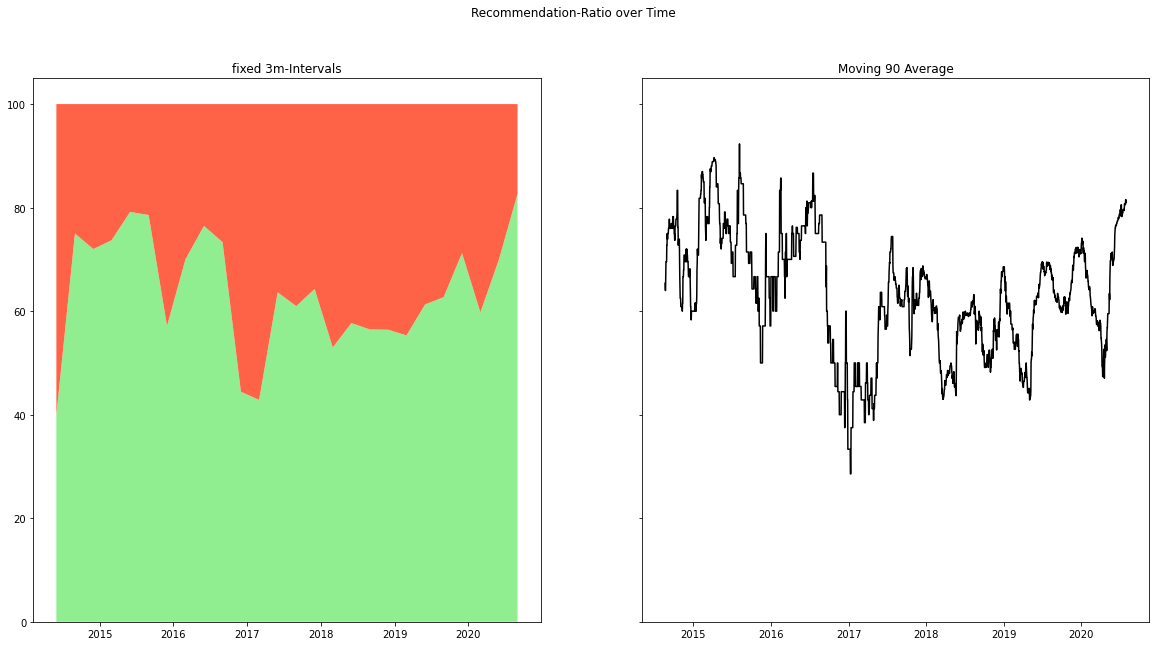

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
fig.suptitle('Recommendation-Ratio over Time')
ax1.stackplot(df_time_agg.index, df_time_agg.ratio, df_time_agg.anti_ratio,colors = flatui)
#ax1.plot(df_time_agg.index, df_time_agg.ratio, marker = "+", color = 'black')
ax1.set_title("fixed "+tsa_width[0]+"-Intervals")
ax2.plot(df_days, color = 'black')
ax2.set_title("Moving "+str(tsa_width[1])+" Average")
plt.show()

### 03-02 : Numerical Features

In [31]:
number_feats = [idx for idx in df.columns if '_N' in idx]

#### 03-02-01 : Average Review Score

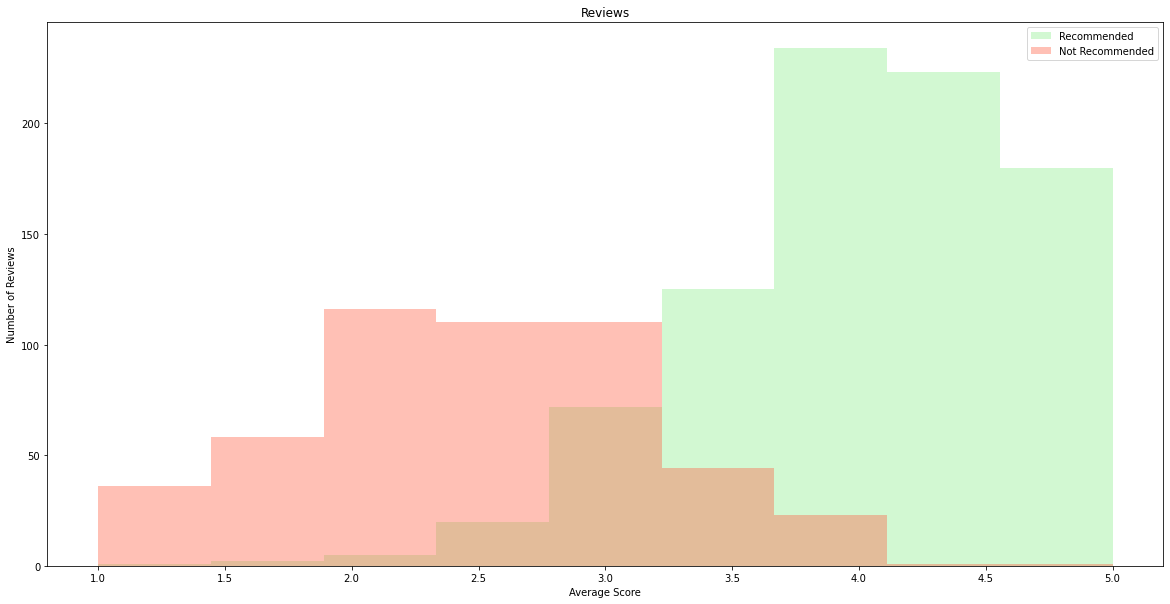

In [32]:
bins = np.linspace(1,5,10)
sns.distplot(df.avg_score[df.recom=="Empfohlen"] , color="lightgreen", label="Recommended", kde = False, bins = bins)
sns.distplot(df.avg_score[df.recom=="Nicht empfohlen"] , color="tomato", label="Not Recommended", kde = False, bins = bins)
plt.xlabel("Average Score")
plt.ylabel("Number of Reviews")
plt.title("Reviews")
plt.legend()
plt.show()

#### 03-02-02 : Categories

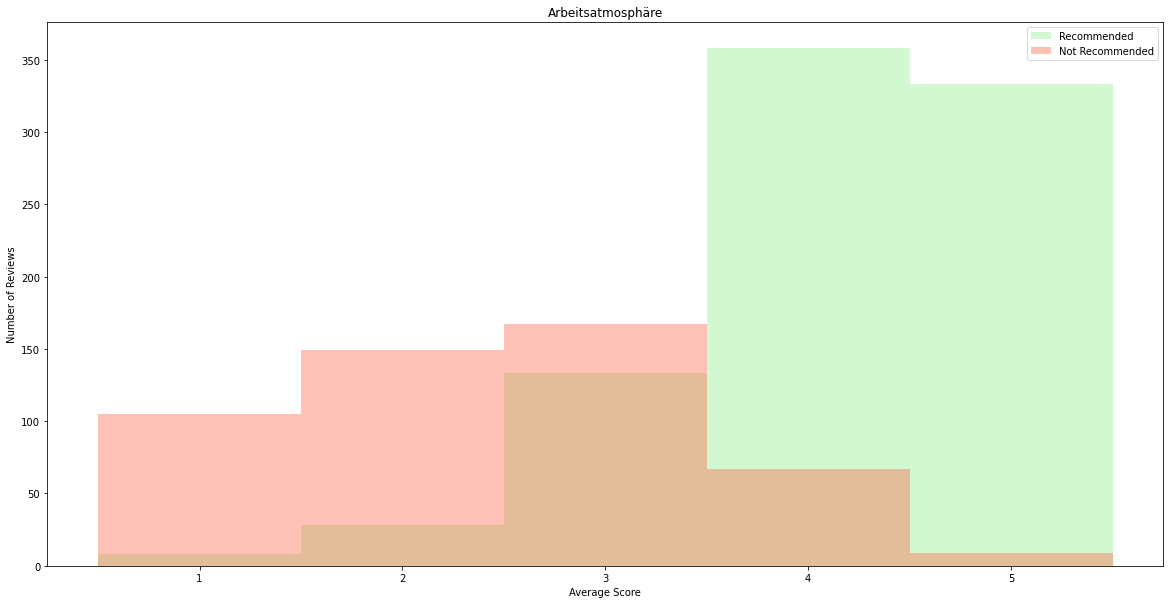

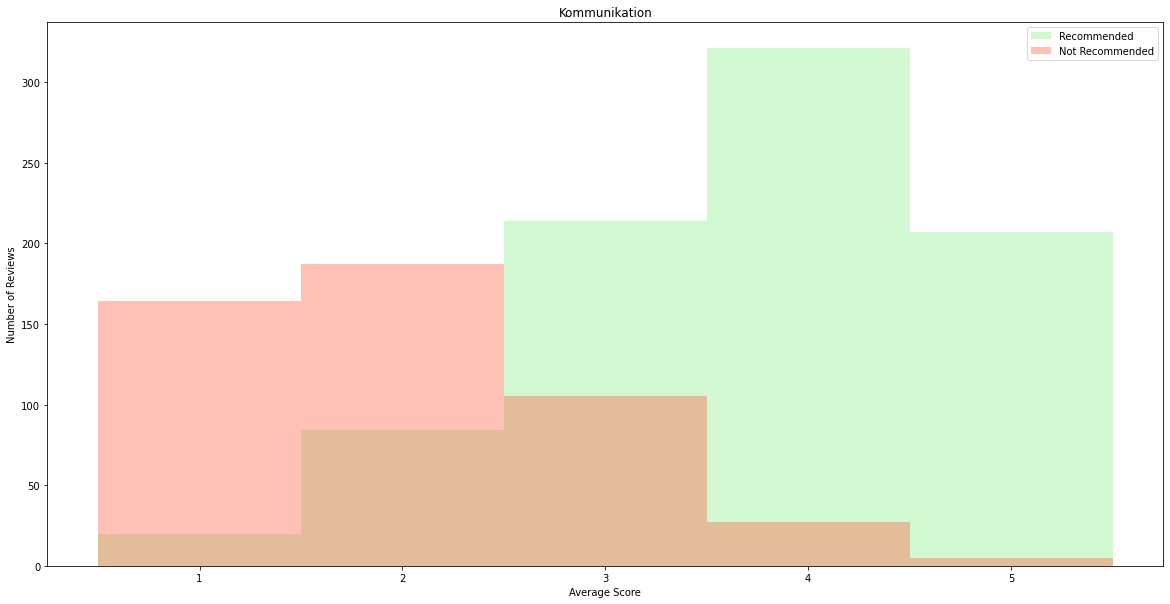

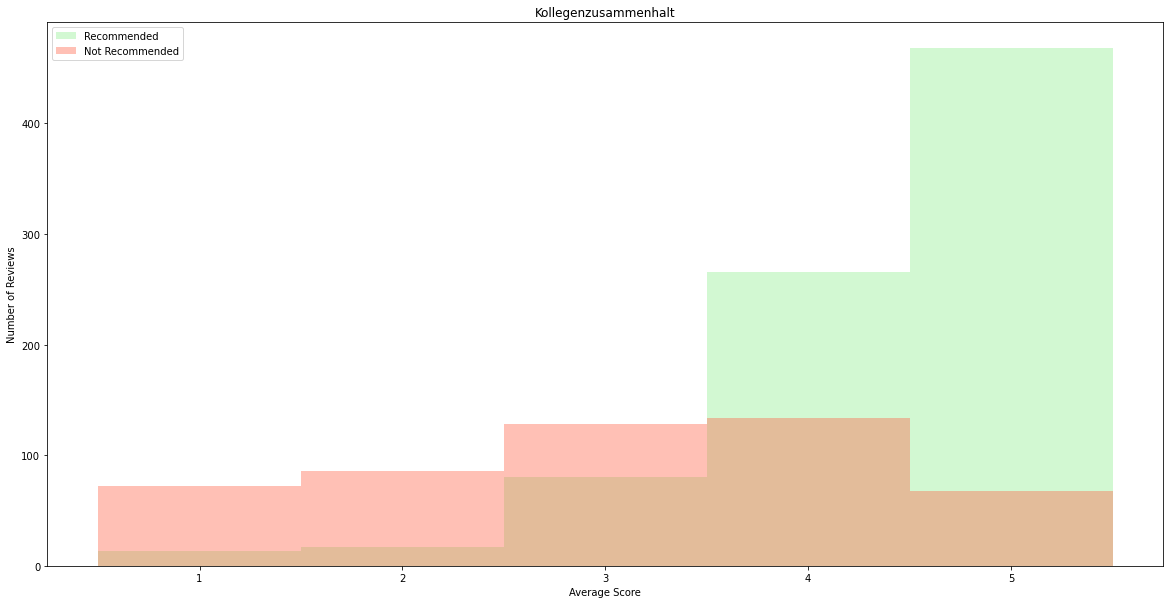

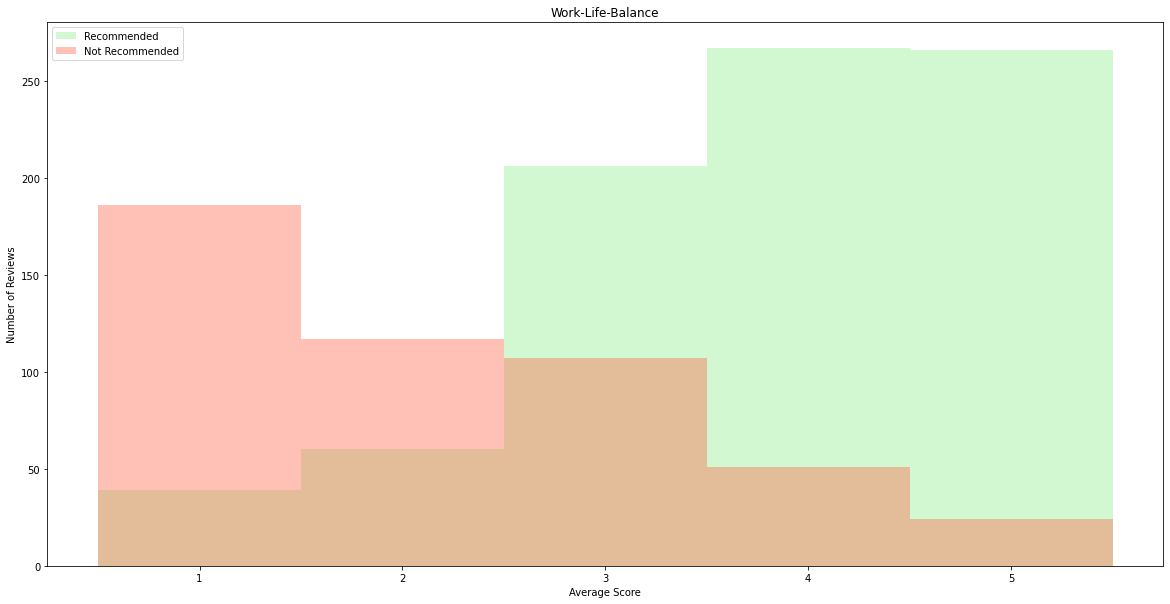

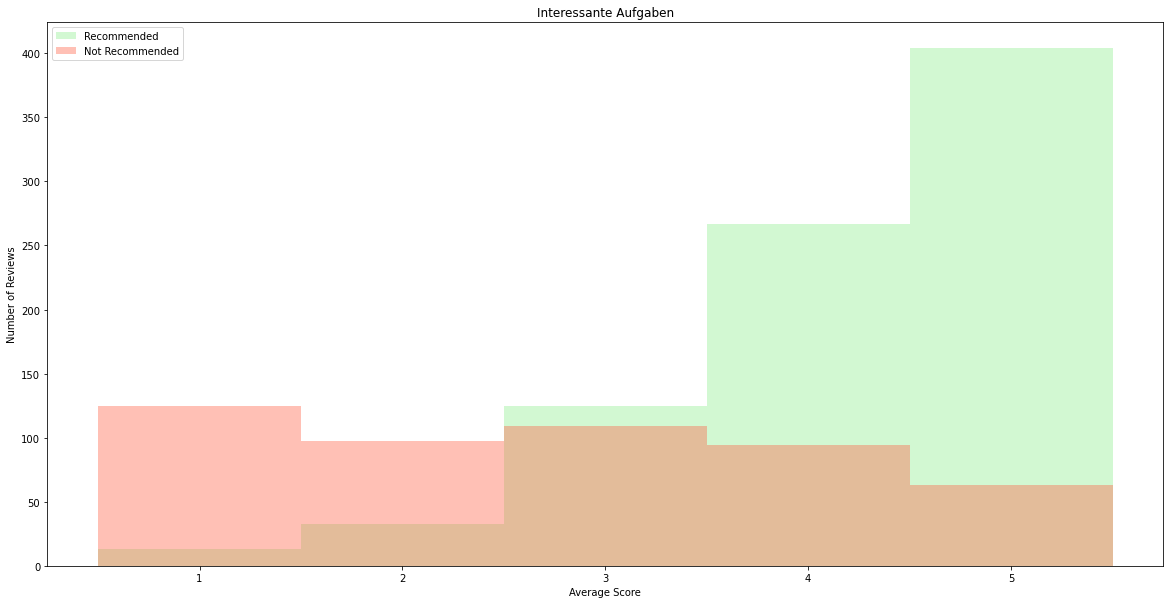

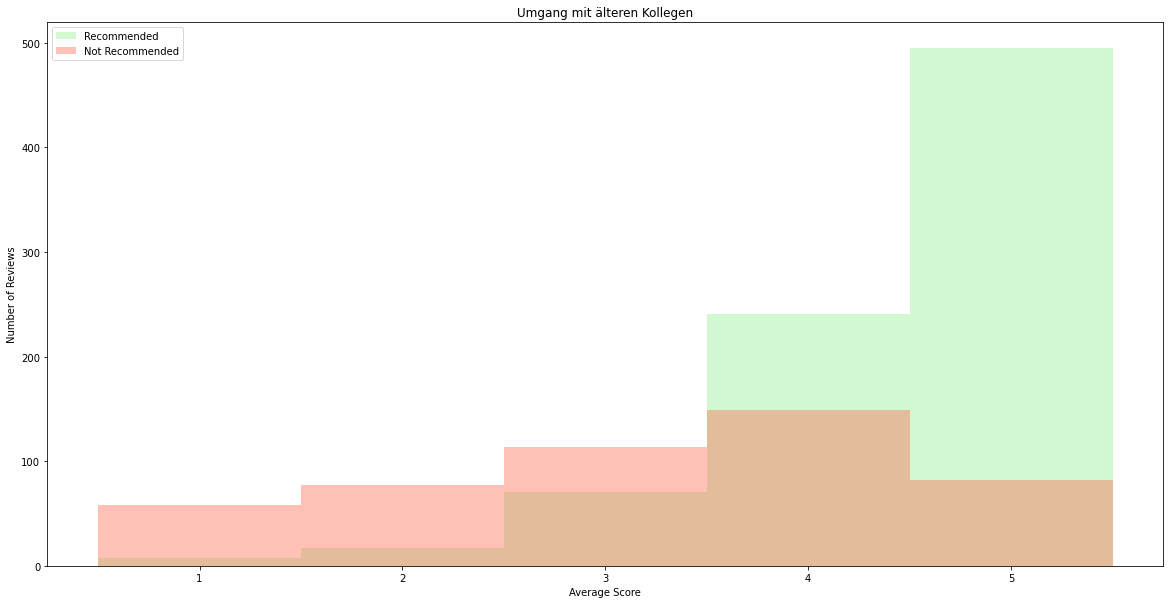

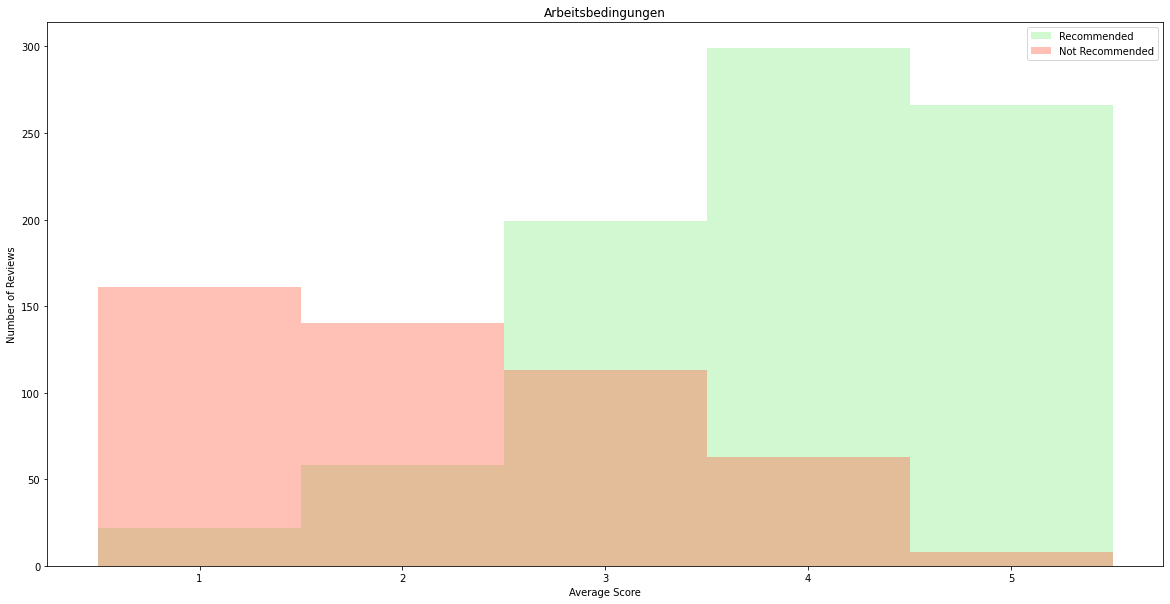

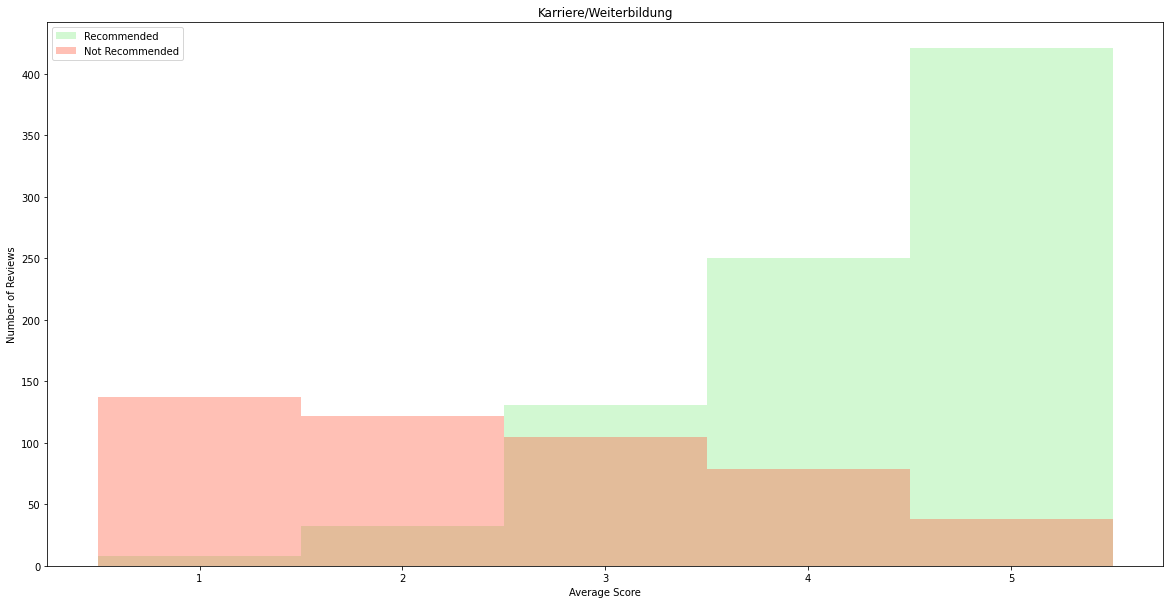

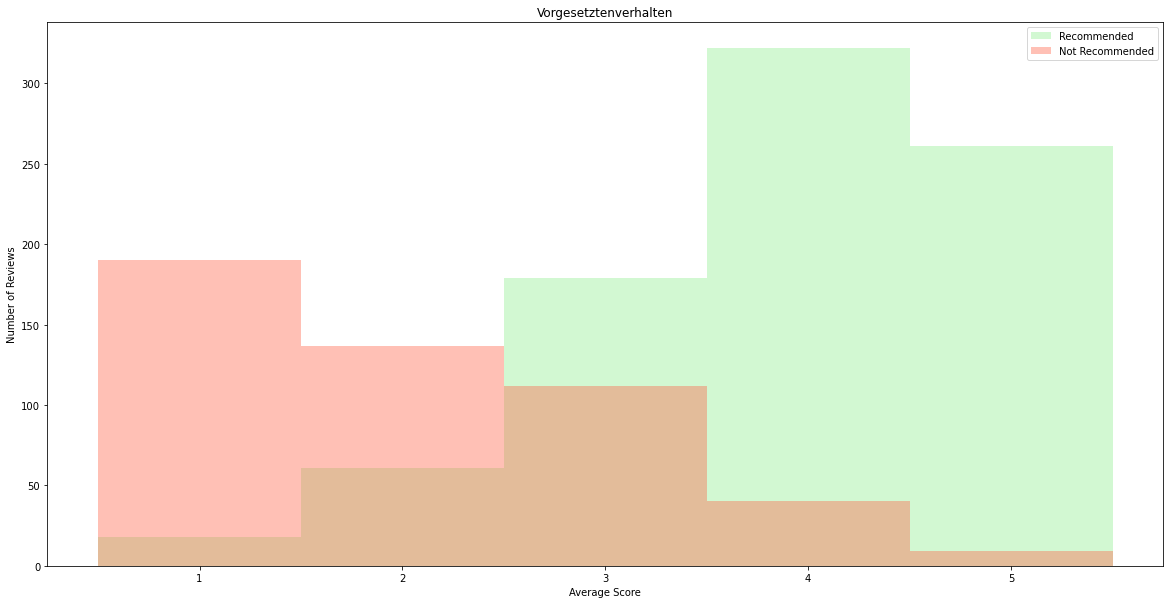

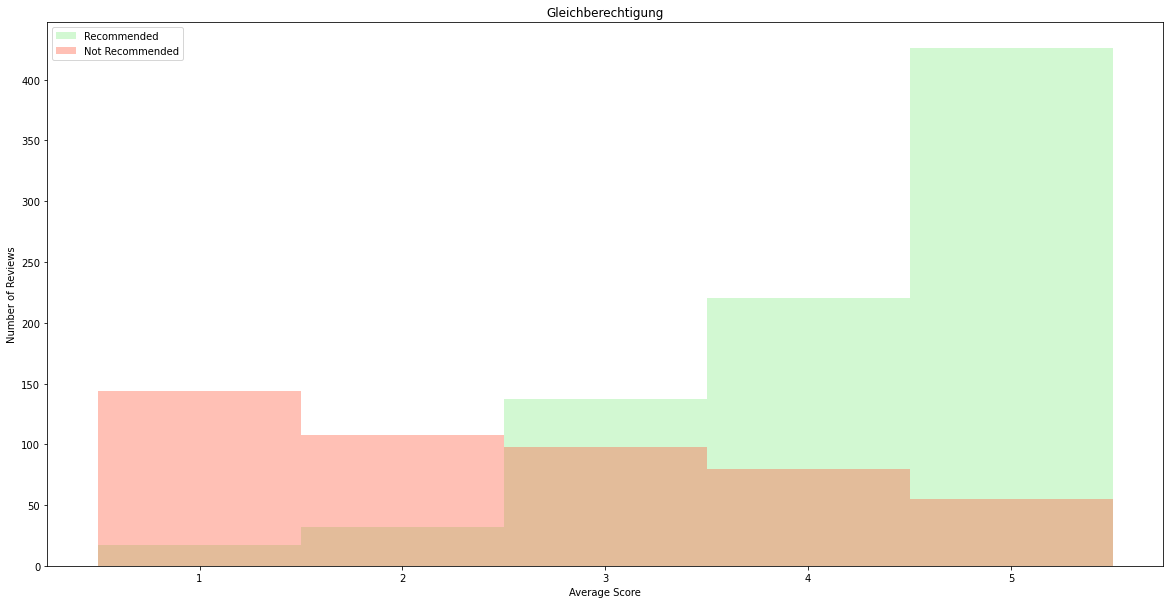

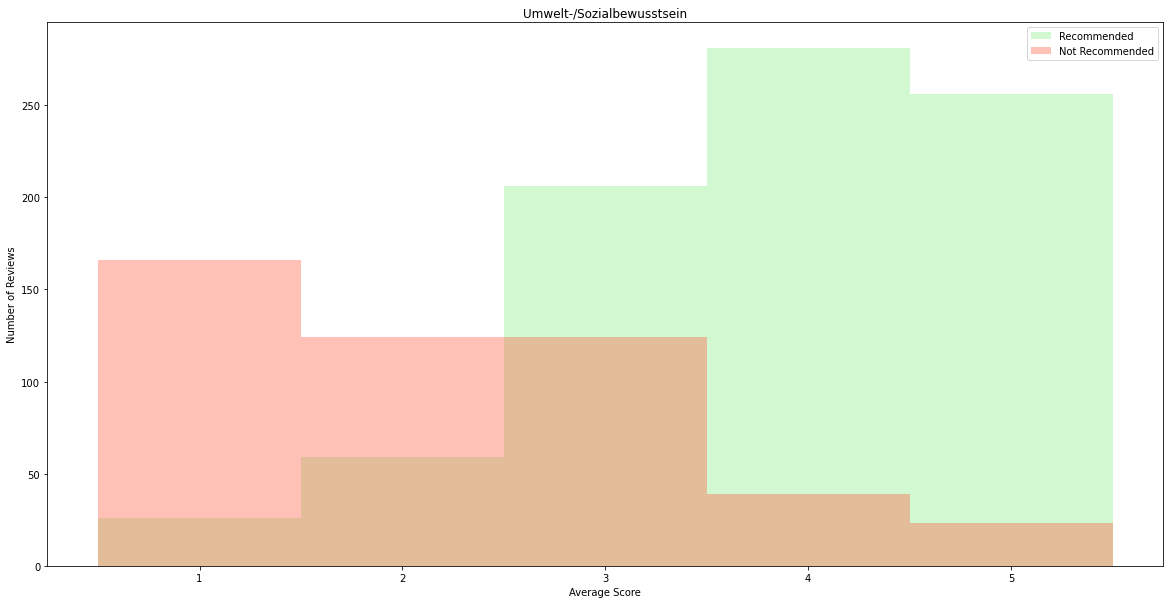

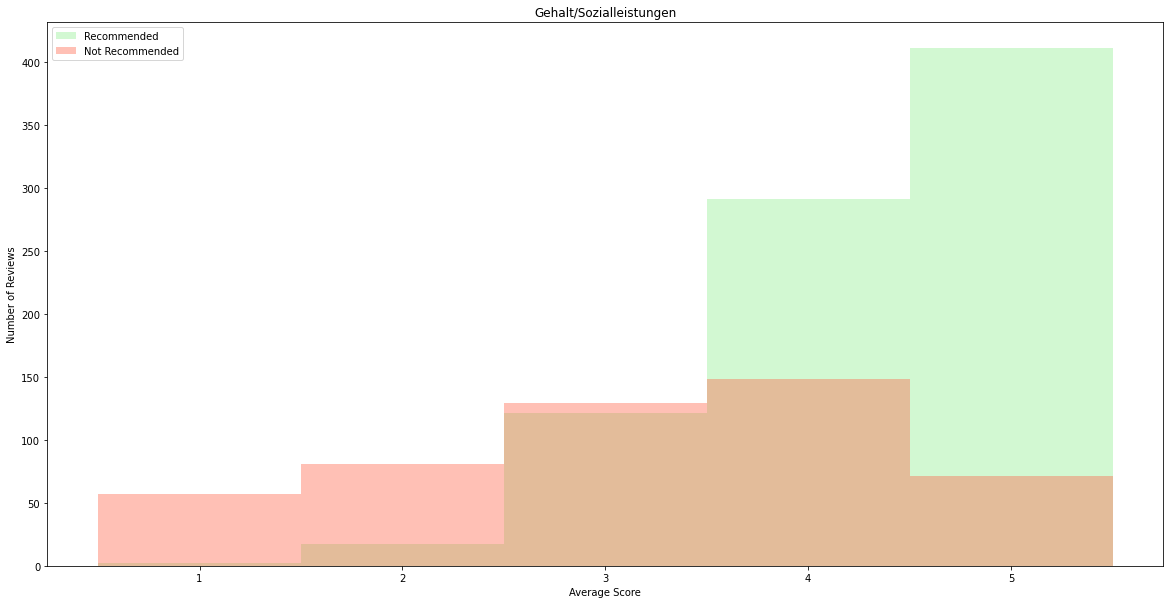

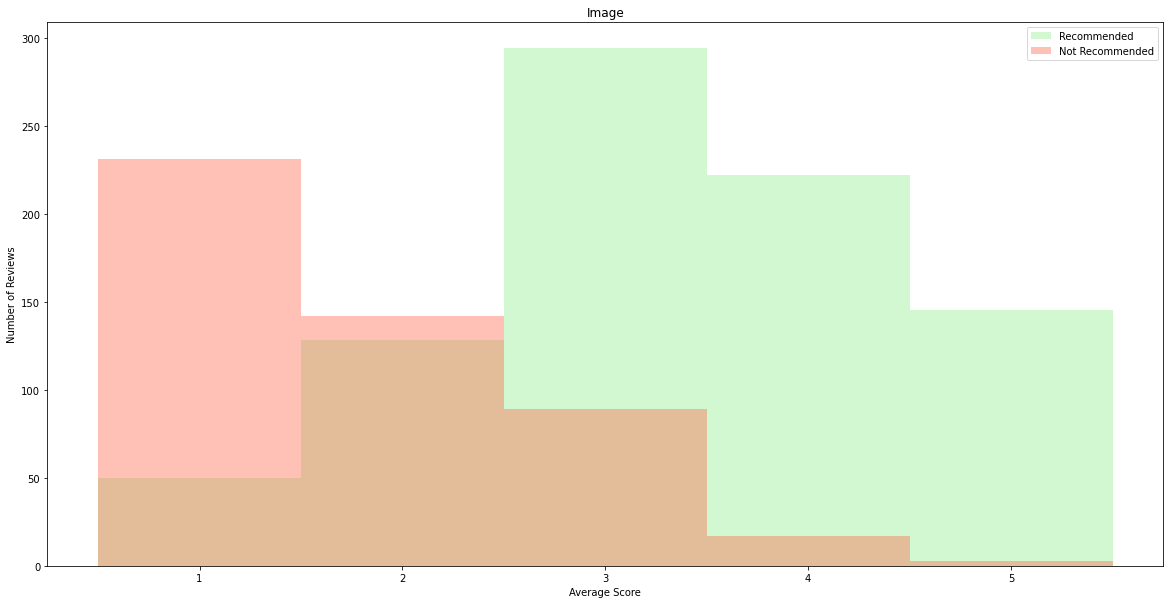

The following categories have been deemed irellevant, in accordance with the thresholds set in 00-03:
Die Ausbilder, Spaßfaktor, Aufgaben/Tätigkeiten, Variation, Respekt, Karrierechancen, Ausbildungsvergütung, Arbeitszeiten


In [33]:
bins = np.linspace(0.5,5.5,6)
for idx in df[number_feats].columns[df[number_feats].isna().sum()/df.shape[0] < 1 - rel_threshold]:
    plt.title(str(idx))
    data          = df[idx]
    sns.distplot(data[df.recom=="Empfohlen"] , color="lightgreen", label="Recommended", kde = False, bins = bins)
    sns.distplot(data[df.recom=="Nicht empfohlen"] , color="tomato", label="Not Recommended", kde = False, bins = bins)
    plt.xlabel("Average Score")
    plt.ylabel("Number of Reviews")
    plt.title(idx.replace("_N",""))
    plt.legend()
    plt.show()
    
print('The following categories have been deemed irellevant, in accordance with the thresholds set in 00-03:')
print(*list(df[number_feats].columns[df[number_feats].isna().sum()/df.shape[0] > 1 - rel_threshold].str.replace('_N','')), sep = ", ")    

### 03-03 : Categorical Features
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Auto Combine Small/ Irrelevant<br>
- Colorscheme for Piecharts<br>
- Argh. Red/ Green switches!!<br>
- Make Functions out of this<br>
</span>
<br>

In [34]:
def cover(word,too_small_fraction):
    if word in too_small_fraction:
        return 'Sonstige'
    else:
        return word

#### 03-03-01 : Former Worker / Current Worker
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Phrase Better (False = Current)<br>
- Change to relative chart<br>
- Auto ID "interesting"<br>
</span>

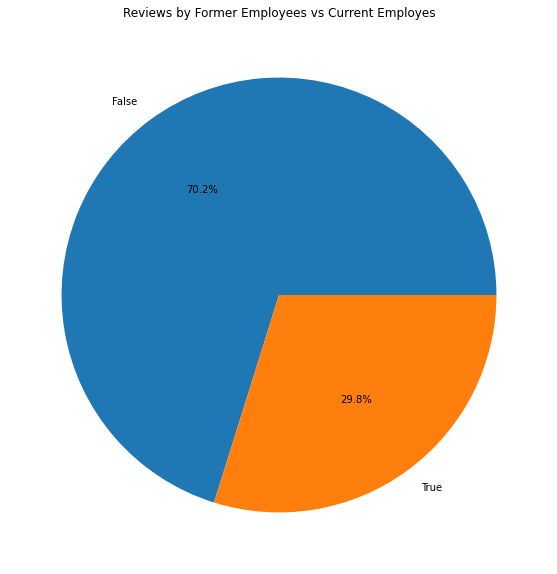

In [35]:
plt.pie(df.ex.value_counts(),labels = df.ex.value_counts().index, autopct='%1.1f%%')
plt.title("Reviews by Former Employees vs Current Employes")
plt.show()

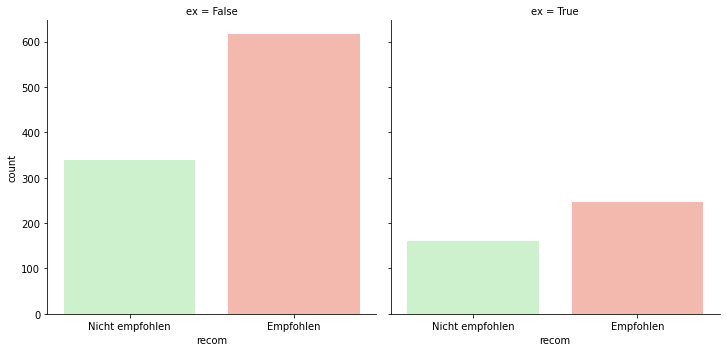

In [36]:
sns.catplot("recom", data = df, kind = "count", col="ex", palette = knncol, alpha = 0.5)
plt.show()

#### 03-03-02 : Type of Contract

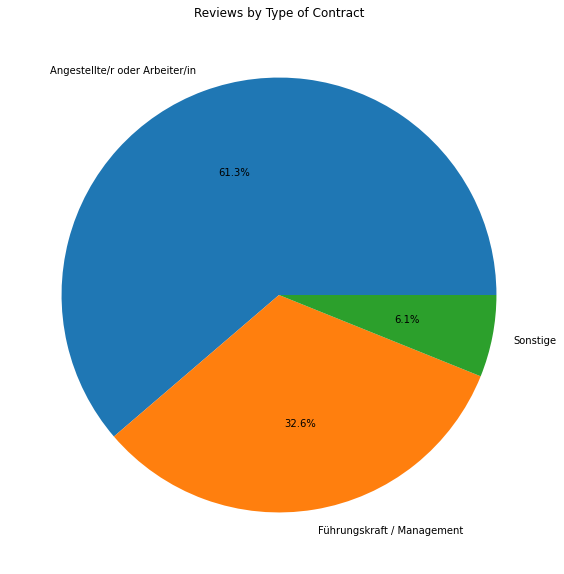

The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:
Zeitarbeiter/in, Auszubildende/r, Werkstudent/in, Praktikant/in, Freelancer


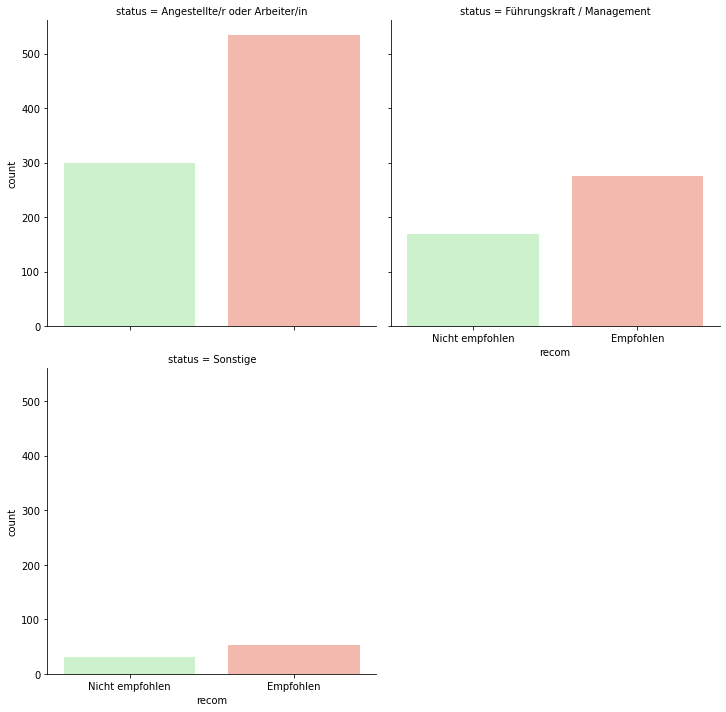

In [37]:
look_at = 'status'

to_small_list = list(df[look_at].value_counts()[df[look_at].value_counts() / df[look_at].notna().sum() <= too_small].index)

focus          = pd.DataFrame([cover(idx,to_small_list) for idx in df[look_at]], columns = [look_at])
focus['recom'] = df.recom

plt.pie(x       = focus[look_at].value_counts(),
        labels  = focus[look_at].value_counts().index,
        autopct ='%1.1f%%')
plt.title("Reviews by Type of Contract")
plt.show()

print('The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:')
print(*to_small_list, sep = ", ")

sns.catplot("recom", data = focus, kind = "count", col=look_at, palette = knncol, col_wrap=2, alpha = 0.5)
plt.show()

#### 03-03-03 : Location

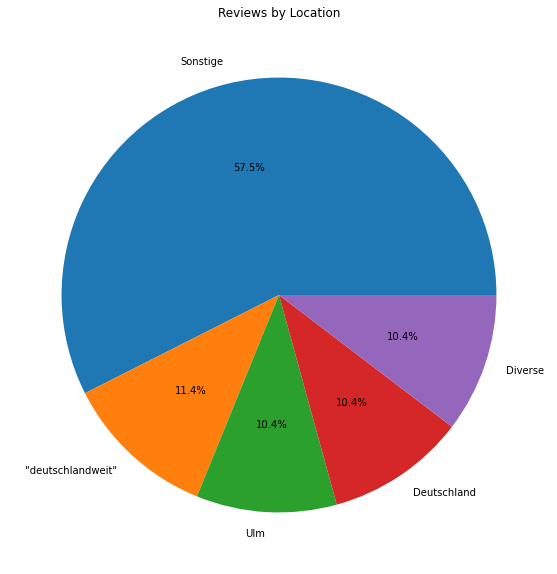

The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:
bundesweit, Köln, Berlin, Hamburg, Bonn, Deustchland, Koblenz, Wilhelmshaven, München, Neubiberg, Münster, Allgemein, Rostock, Düsseldorf, Mannheim, Stetten am kalten Markt, Bad Frankenhausen/Kyffhäuser, Aachen, Seedorf, Laupheim, Erfurt, Feldafing, Oldenburg (Oldenburg), Mittenwald, Landsberg, Lüneburg, Parow/Hamburg, Roth, Bad Reichenhall, Augustdorf, Fritzlar, Flensburg, Fliegenden Einheiten, Bremerhaven, Hammelburg, Bad Salzungen, Erndtebrück, Wiesbaden, Mayen, Bruchsal, Stralsund, Celle, Torgelow, Erding, Potsdam, Veitshöchheim, Zweibrücken, Rheinbach, Hannover, Calw, Stetten a.k.M. und Esslingen/N, Faßberg, Minden, Leipzig, BRD, Kaufbeuren, Stuttgart, Sonthofen, Mainz, Euskirchen, Sanitz, Oldenburg, Sigmaringen, Neubrandenburg, Rotenburg (Wümme), Nordholz, Dillingen/Donau, Bad Mergentheim, Wunstorf, Dresden, Meßstetten, Garching b. München, Unna, Havelberg, Eckernförde, KobKoblenz, U

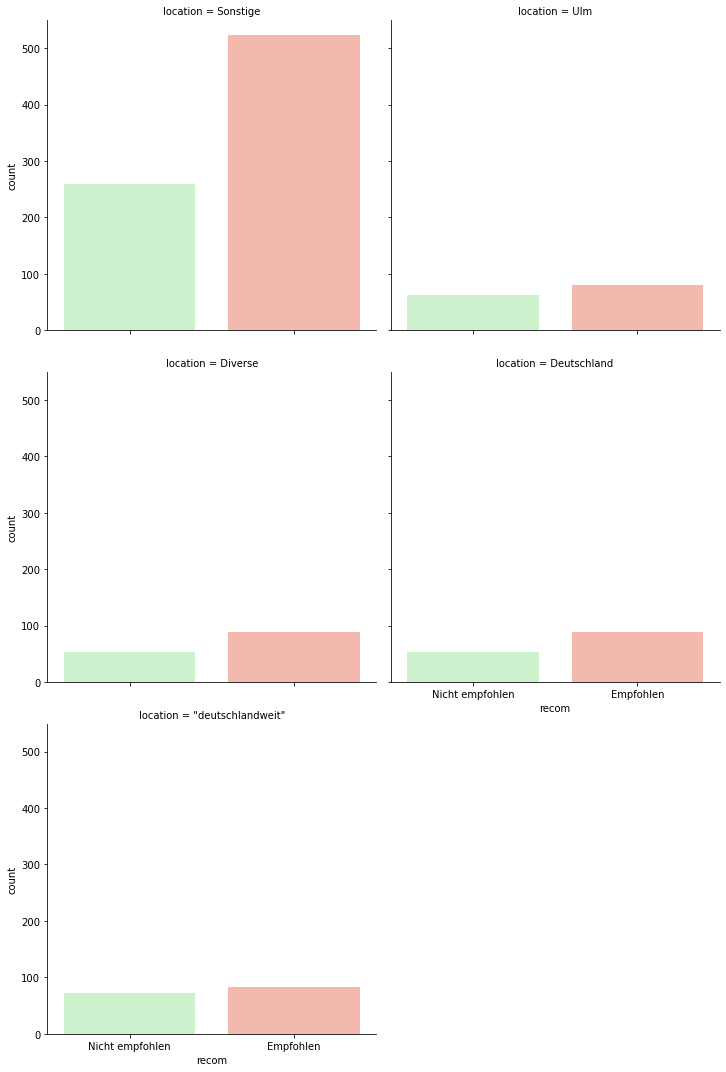

In [38]:
look_at = 'location'

to_small_list = list(df[look_at].value_counts()[df[look_at].value_counts() / df[look_at].notna().sum() <= too_small].index)

focus          = pd.DataFrame([cover(idx,to_small_list) for idx in df[look_at]], columns = [look_at])
focus['recom'] = df.recom

plt.pie(x       = focus[look_at].value_counts(),
        labels  = focus[look_at].value_counts().index,
        autopct ='%1.1f%%')
plt.title("Reviews by Location")
plt.show()

print('The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:')
print(*to_small_list, sep = ", ")

sns.catplot("recom", data = focus, kind = "count", col=look_at, palette = knncol, col_wrap=2, alpha = 0.5)
plt.show()

#### 03-03-04 : Division

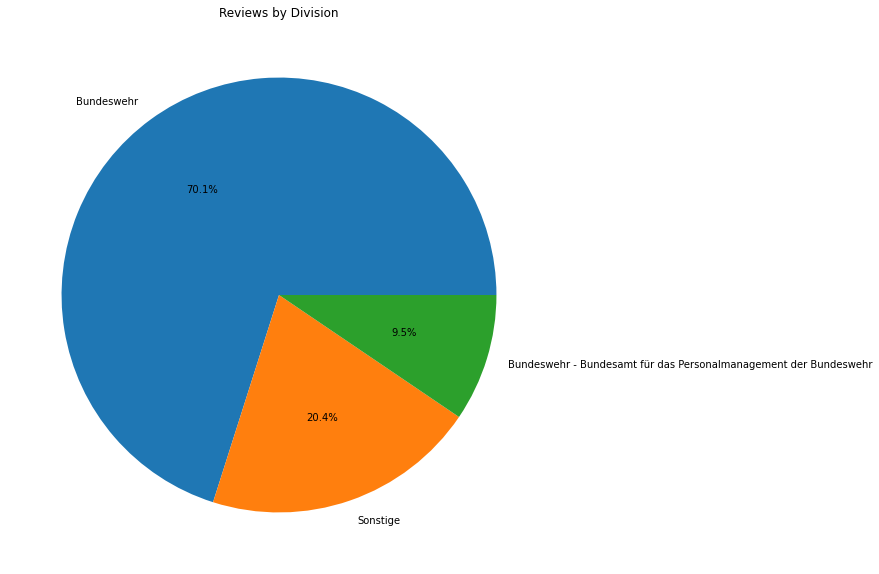

The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:
Bundeswehr - Bundesministerium der Verteidigung, Bundesamt für das Personalmanagement der Bundeswehr, Bundesamt für Ausrüstung, Informationstechnik und Nutzung der Bundeswehr (ehem. Bundesamt für Wehrtechnik und Beschaffung), Bundeswehr / Marine, Deutsche Bundeswehr, Universität der Bundeswehr München, Universität der Bundeswehr, Deutscher Bundeswehr-Verband e.V., Bundeswehr BMVg, Bundeswehrkrankenhaus Ulm, Bundeswehr, Deutsche Marine, Bildungszentrum der bundeswehr, Bundeswehr allgemein, bundeswehr, Helmut-Schmidt-Universität / Universität der Bundeswehr Hamburg, Bundeswehr Köln, Deutsche Bundeswehr, Heer, Führungsakademie der Bundeswehr, Bundeswehrzentralkrankenhaus, Bundeswehr (Munster), bundeswehr (mayen), Planungsamt der Bundeswehr, bundeswehr Neubrandenburg / Deutschland, bundeswehrfeuerwehr, Zentraler Sanitätsdienst der Bundeswehr, Bundeswehr Dienstleistungszentrum Doberlug-Kirchhai

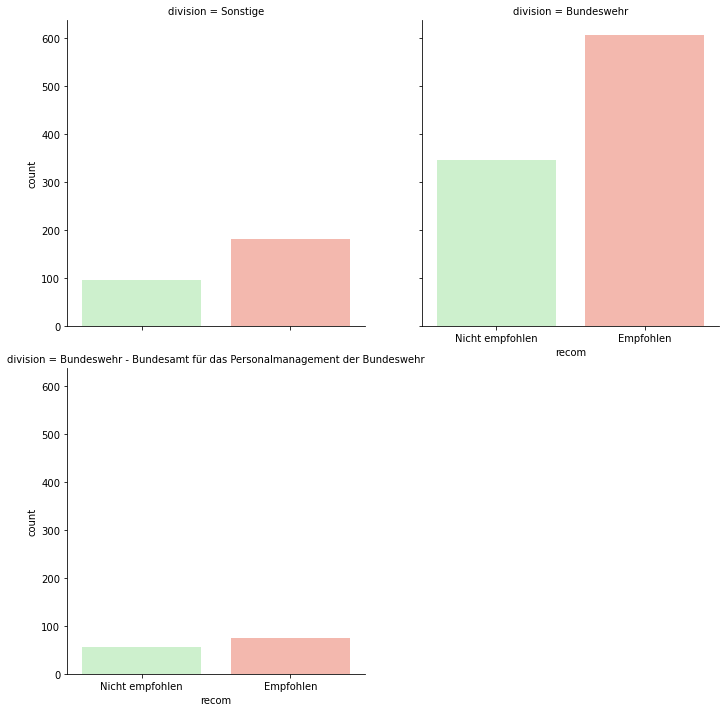

In [39]:
look_at = 'division'

to_small_list = list(df[look_at].value_counts()[df[look_at].value_counts() / df[look_at].notna().sum() <= too_small].index)

focus          = pd.DataFrame([cover(idx,to_small_list) for idx in df[look_at]], columns = [look_at])
focus['recom'] = df.recom

plt.pie(x       = focus[look_at].value_counts(),
        labels  = focus[look_at].value_counts().index,
        autopct ='%1.1f%%')
plt.title("Reviews by Division")
plt.show()

print('The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:')
print(*to_small_list, sep = ", ")

sns.catplot("recom", data = focus, kind = "count", col=look_at, palette = knncol, col_wrap=2, alpha = 0.5)
plt.show()

#### 03-03-05 : Department

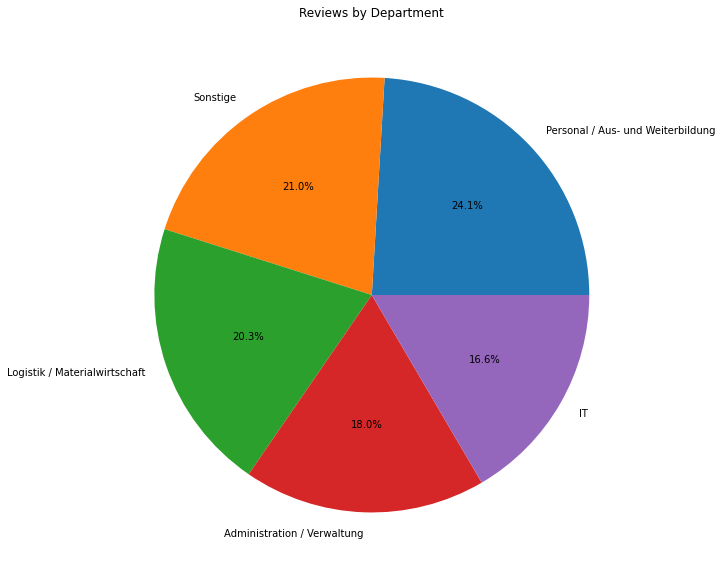

The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:
PR / Kommunikation, Forschung / Entwicklung, Produktion, Beschaffung / Einkauf, Finanzen / Controlling, Geschäftsführung, Recht / Steuern, Marketing / Produktmanagement, Design / Gestaltung, Vertrieb / Verkauf


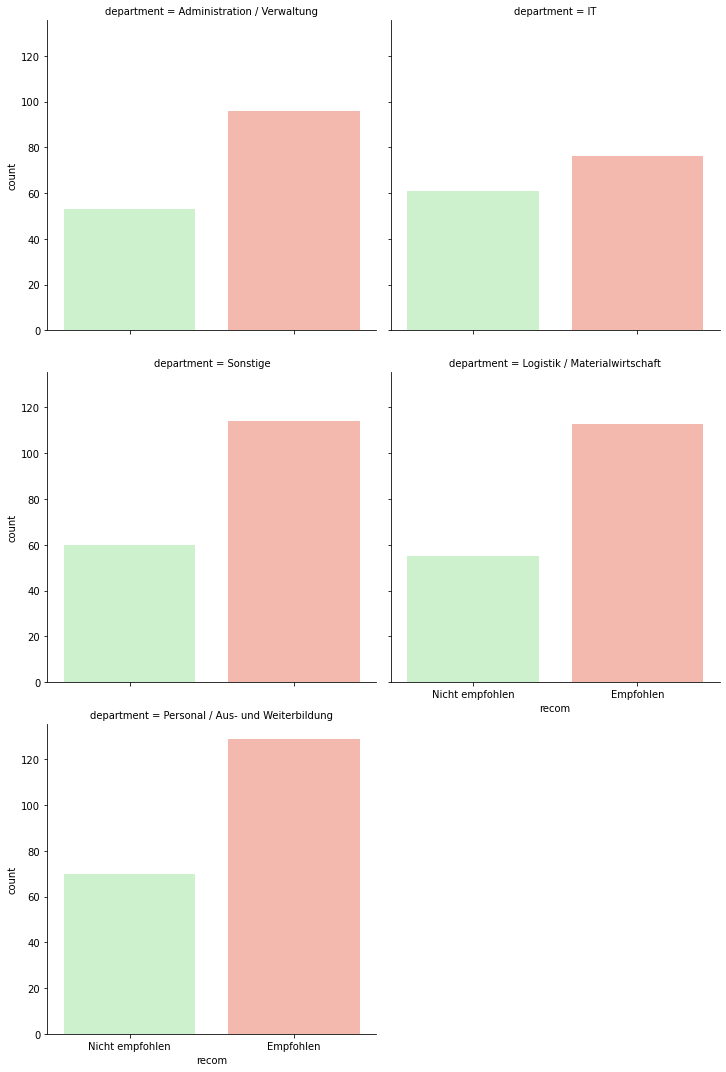

In [40]:
look_at = 'department'

to_small_list = list(df[look_at].value_counts()[df[look_at].value_counts() / df[look_at].notna().sum() <= too_small].index)

focus          = pd.DataFrame([cover(idx,to_small_list) for idx in df[look_at]], columns = [look_at])
focus['recom'] = df.recom

plt.pie(x       = focus[look_at].value_counts(),
        labels  = focus[look_at].value_counts().index,
        autopct ='%1.1f%%')
plt.title("Reviews by Department")
plt.show()

print('The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:')
print(*to_small_list, sep = ", ")

sns.catplot("recom", data = focus, kind = "count", col=look_at, palette = knncol, col_wrap=2, alpha = 0.5)
plt.show()

#### 03-03-06 : Language
Not part of Text Analysis

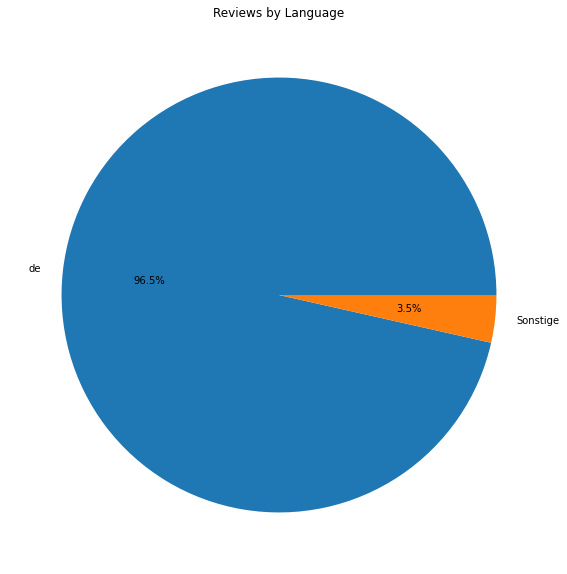

The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:
en, UKN, af, so, pl, tl, it, fr, id, nl, sv, da, lt, vi, no, hr, et, fi, cy, pt, sw, sl


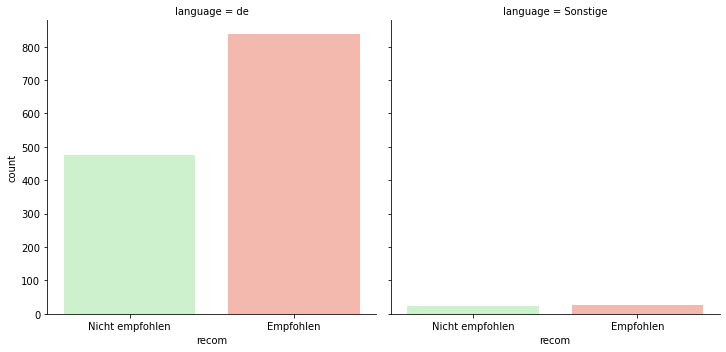

In [41]:
look_at = 'language'

to_small_list = list(df[look_at].value_counts()[df[look_at].value_counts() / df[look_at].notna().sum() <= too_small].index)

focus          = pd.DataFrame([cover(idx,to_small_list) for idx in df[look_at]], columns = [look_at])
focus['recom'] = df.recom

plt.pie(x       = focus[look_at].value_counts(),
        labels  = focus[look_at].value_counts().index,
        autopct ='%1.1f%%')
plt.title("Reviews by Language")
plt.show()

print('The following have been aggregated in "Sonstige", in accordance with the thresholds set in 00-03:')
print(*to_small_list, sep = ", ")

sns.catplot("recom", data = focus, kind = "count", col=look_at, palette = knncol, col_wrap=2, alpha = 0.5)
plt.show()

<i> langdetect is not perfect - but it can only work with what it is fed. Short Reviews with little, or no text will lead to wrong classifications.</i>

### 03-02 : Textual Analysis

#### 03-02-01 : Preprocess Text
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Find and Use German Stemmer / Lemmatizer<br>
</span>

In [42]:
# Set up new DataFrame
# Delete non German observation, 
df_text = df[df.language == 'de']
# DataFrame for Label
df_label = df[df.language == 'de'].recom
# Reset Index
df_text.reset_index(drop = True, inplace = True)
df_label.reset_index(drop = True, inplace = True)
# Remove all non text features, ...
temp    = df_text[text_feats]
df_text = temp
# Replace Missing Values
df_text = df_text.fillna('')

In [43]:
# Tokenize
def save_tokenize(words):
    try:
        return word_tokenize(words)
    except:
        return ('0')

df_temp = pd.DataFrame([])
for idx in df_text.columns:
    test = [save_tokenize(idx_2) for idx_2 in df_text[idx]] 
    df_temp[idx] = test
df_text = df_temp

In [44]:
# Remove numbers and punctuation
df_temp = pd.DataFrame([])
for idx in df_text.columns:
    test = [[idx_3 for idx_3 in idx_2
              if idx_3.isalpha()]
             for idx_2 in df_text[idx]]
    df_temp[idx] = test
df_text = df_temp

In [45]:
# All lowercase
df_temp = pd.DataFrame([])
for idx in df_text.columns:
    test = [[idx_3.lower() for idx_3 in idx_2]
             for idx_2 in df_text[idx]]
    df_temp[idx] = test
df_text = df_temp

In [46]:
# Remove Stopwords
df_temp = pd.DataFrame([])
for idx in df_text.columns:
    test = [[idx_3 for idx_3 in idx_2
              if idx_3 not in stopwords.words('german')]
             for idx_2 in df_text[idx]]
    df_temp[idx] = test
df_text = df_temp

#### 03-02-02 : Word Frequency Analysis
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Rethink how to handle categories like "Gut am Arbeitgeber finde ich" / "Verbesserungsvorschläge" -> Employee Sentiment is in the open here<br>
- Apply Seaborn<br>
- Polish Code<br>
- COMMENT!<br>
</span>

In [47]:
# Cut Text into the necessary pieces
df_alltext = pd.DataFrame([])
for idx in df_text.columns:
    tokenized   = df_text[idx]
    minus_texts = [tokenized[idx] for idx in range(0,len(tokenized))
                   if df_label[idx] == "Nicht empfohlen"]
    minus_temp  = [val for sublist in minus_texts for val in sublist]
    
    plus_texts  = [tokenized[idx] for idx in range(0,len(tokenized))
                   if df_label[idx] == "Empfohlen"]
    plus_temp  = [val for sublist in plus_texts for val in sublist]
    
    df_alltext[idx] = [plus_temp,minus_temp]
df_alltext.index = ['recom','norecom']

##### 03-02-02-01: Whole Text
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Write Functions, Implement<br>
</span><br>
Look at all the company's reviews as one.

In [48]:
# Arrange Words
pluswords  = [val for sublist in df_alltext.loc['recom'] for val in sublist]
minuswords = [val for sublist in df_alltext.loc['norecom'] for val in sublist]
allwords   = pluswords + minuswords

In [49]:
# Combine all Tokens
allwords_Counter = Counter(allwords)
minus_Counter    = Counter(minuswords)
plus_Counter     = Counter(pluswords)

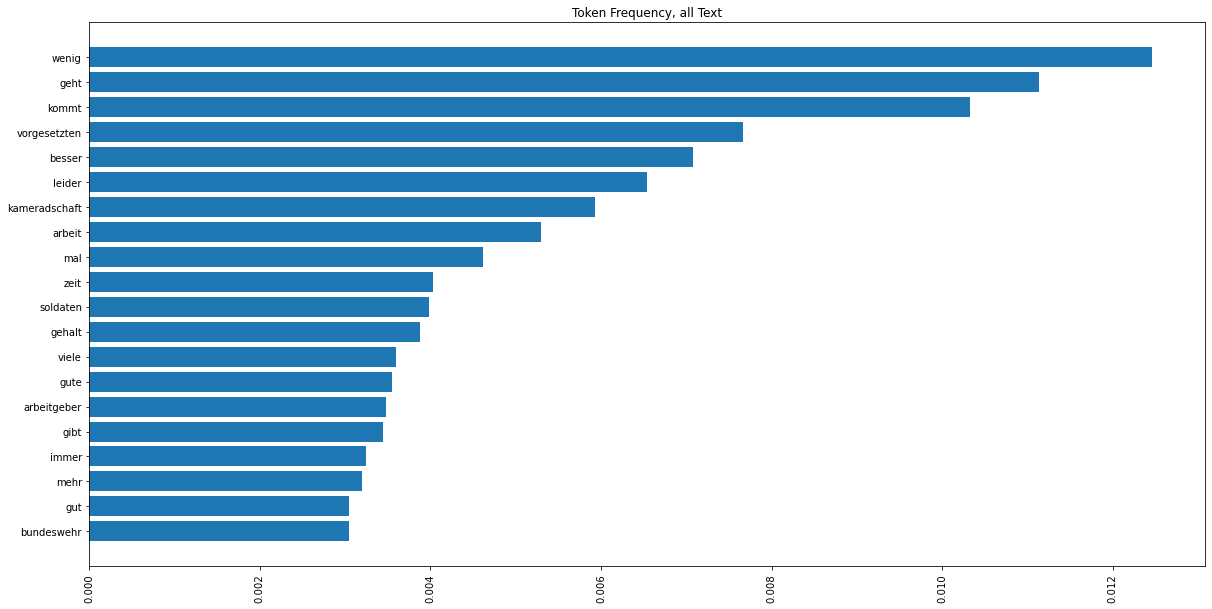

In [50]:
plt.barh(y = [idx[0] for idx in allwords_Counter.most_common(20)],
         width = np.array([idx[1] for idx in allwords_Counter.most_common(20)])[::-1]/len(allwords))
plt.xticks(rotation = 90)
plt.title("Token Frequency, all Text")
plt.show()

In [51]:
allall = pd.DataFrame.from_dict(Counter(allwords), orient='index')/len(allwords)
plus   = pd.DataFrame.from_dict(Counter(pluswords), orient='index')/len(pluswords)
minus  = pd.DataFrame.from_dict(Counter(minuswords), orient='index')/len(minuswords)

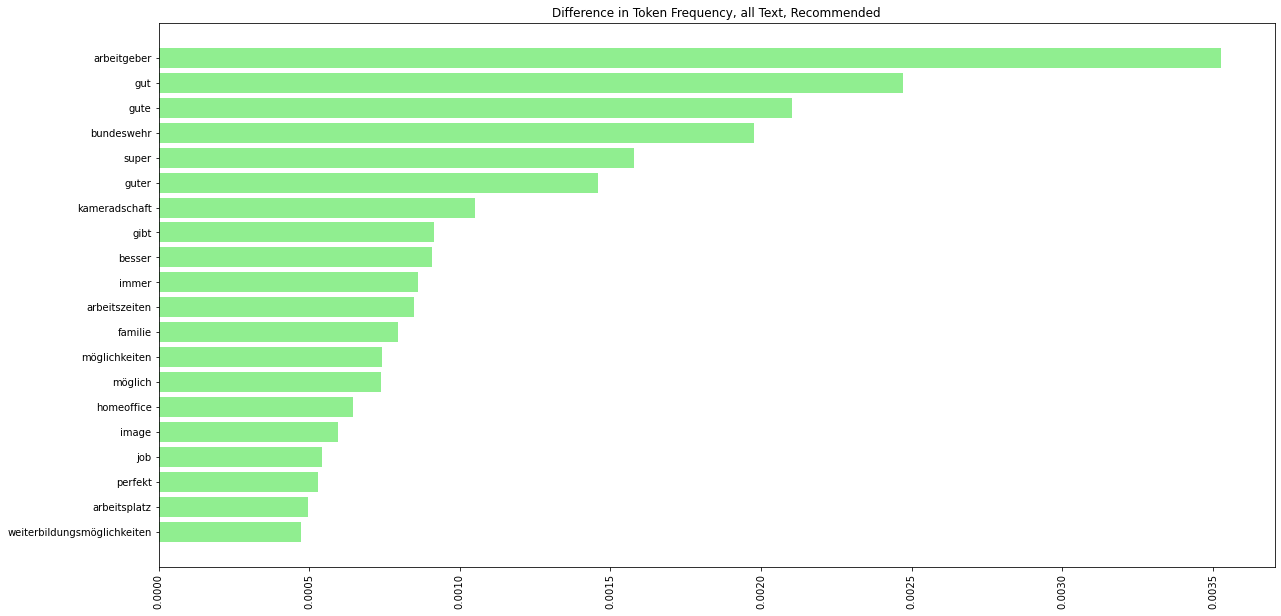

In [52]:
look_at = (plus-allall).sort_values(by = 0, ascending = False).head(20)
plt.barh(y = look_at.index[::-1],
        width = look_at[0][::-1],
        color = "lightgreen")
plt.xticks(rotation = 90)
plt.title("Difference in Token Frequency, all Text, Recommended")
plt.show()

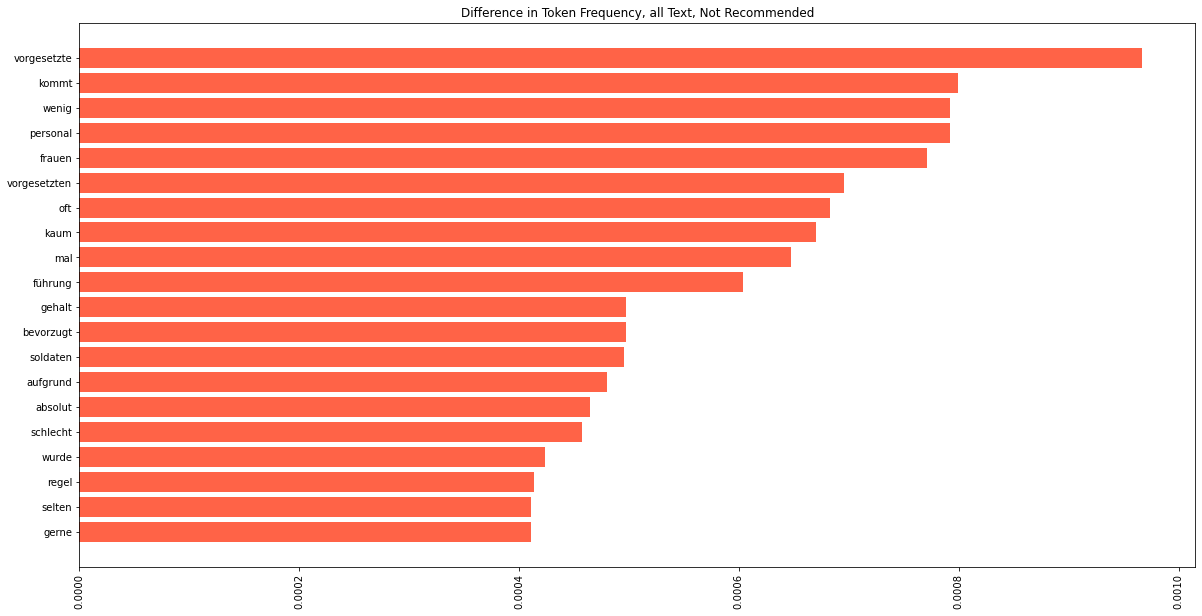

In [53]:
look_at = (minus-allall).sort_values(by = 0, ascending = False).head(20)
plt.barh(y = look_at.index[::-1],
        width = look_at[0][::-1],
        color = "tomato")
plt.xticks(rotation = 90)
plt.title("Difference in Token Frequency, all Text, Not Recommended")
plt.show()

##### 03-02-02-02 : By Category
Look at the reviews by category.

In [54]:
# Which Categories have enough words to proceed?
enough_words = []
for idx in df_alltext.columns:
    if (len(df_alltext.loc['recom',idx]) >= min_words)&(len(df_alltext.loc['norecom',idx]) >= min_words):
        enough_words.append(idx)
        
print('The following categories have been deemed irellevant, in accordance with the thresholds set in 00-03:')
print(*[idx.replace('_T','') for idx in df_alltext.columns if idx not in enough_words], sep = ", ")        

The following categories have been deemed irellevant, in accordance with the thresholds set in 00-03:
Wofür möchtest du deinen Arbeitgeber im Umgang mit der Corona-Situation loben?, Wie kann dich dein Arbeitgeber im Umgang mit der Corona-Situation noch besser unterstützen?, Was macht dein Arbeitgeber im Umgang mit der Corona-Situation nicht gut?, Wo siehst du Chancen für deinen Arbeitgeber mit der Corona-Situation besser umzugehen?, Was macht dein Arbeitgeber in Corona-Zeiten gut?, Was macht dein Arbeitgeber in Corona-Zeiten nicht gut?, Was sollte dein Unternehmen in Corona-Zeiten (anders) machen?, Die Ausbilder, Spaßfaktor, Arbeitszeiten, Aufgaben/Tätigkeiten, Variation, Karrierechancen, Ausbildungsvergütung, Respekt


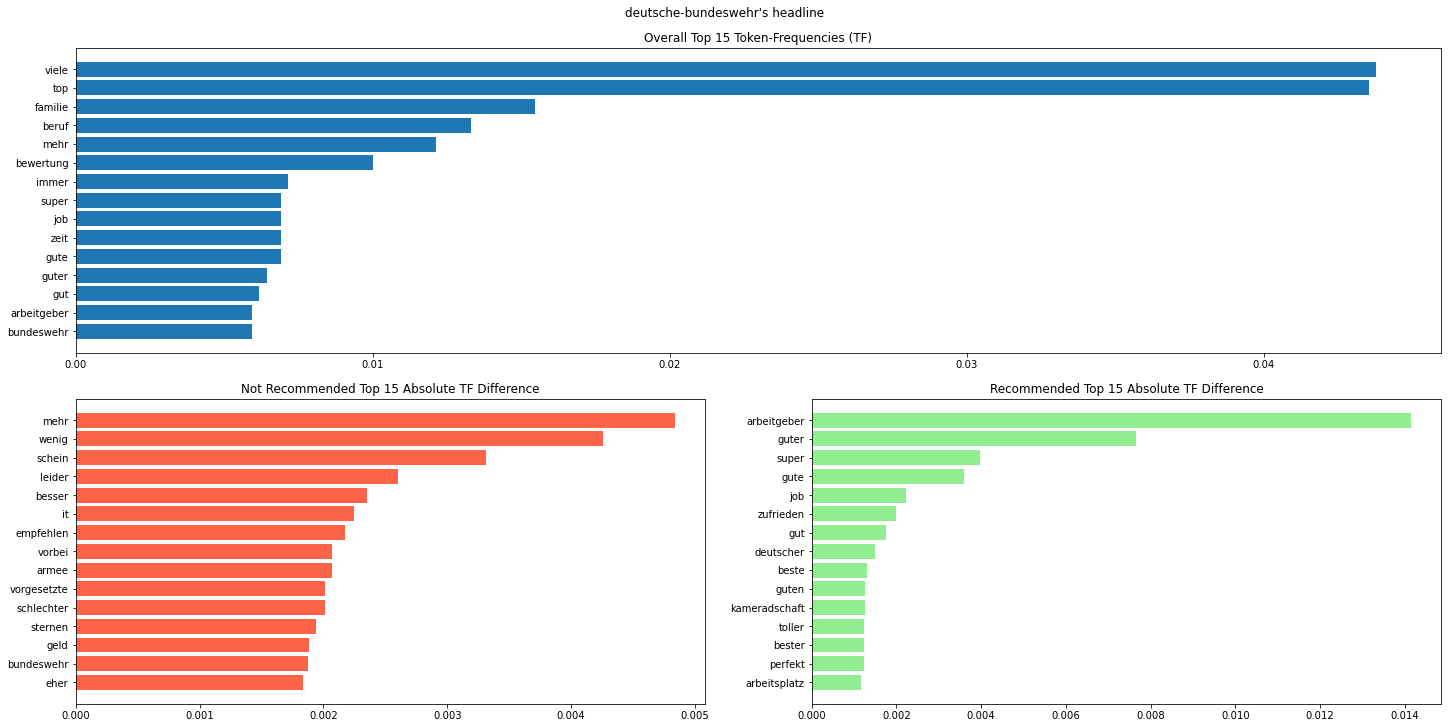

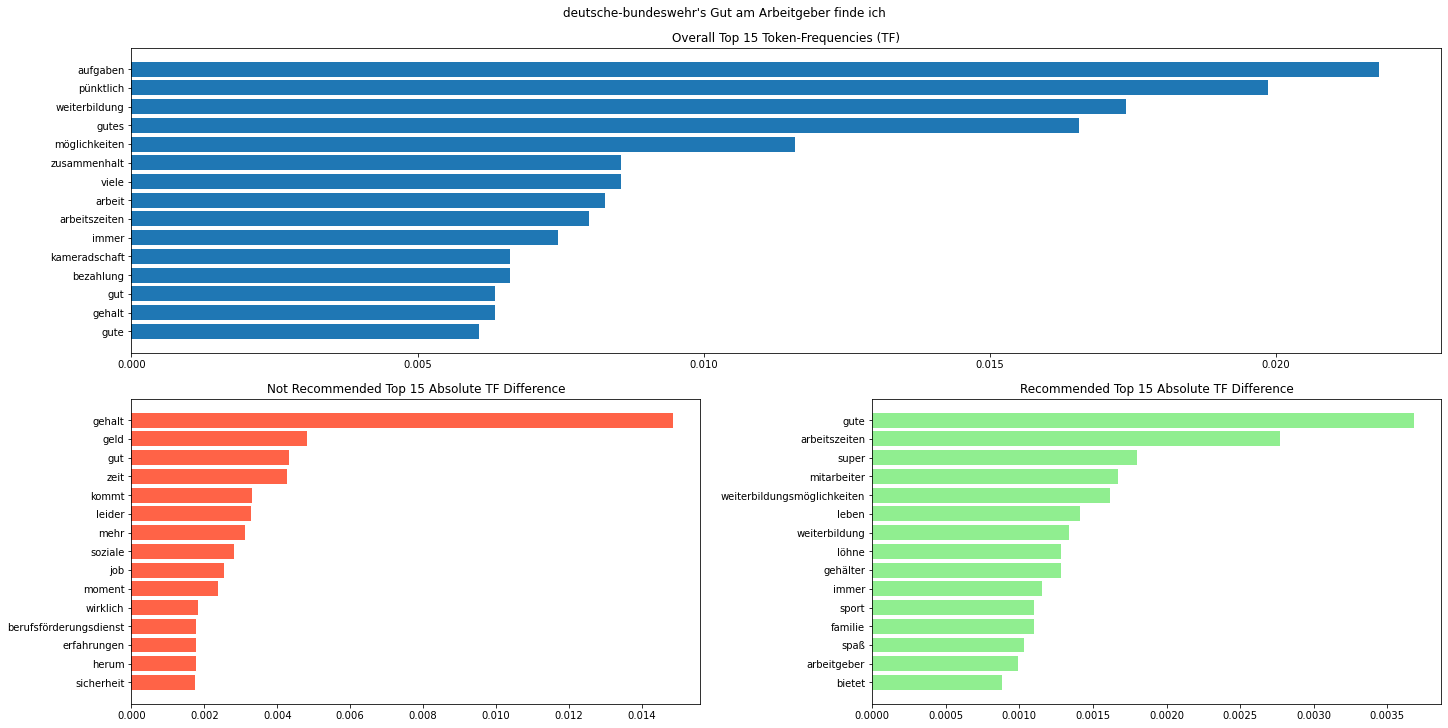

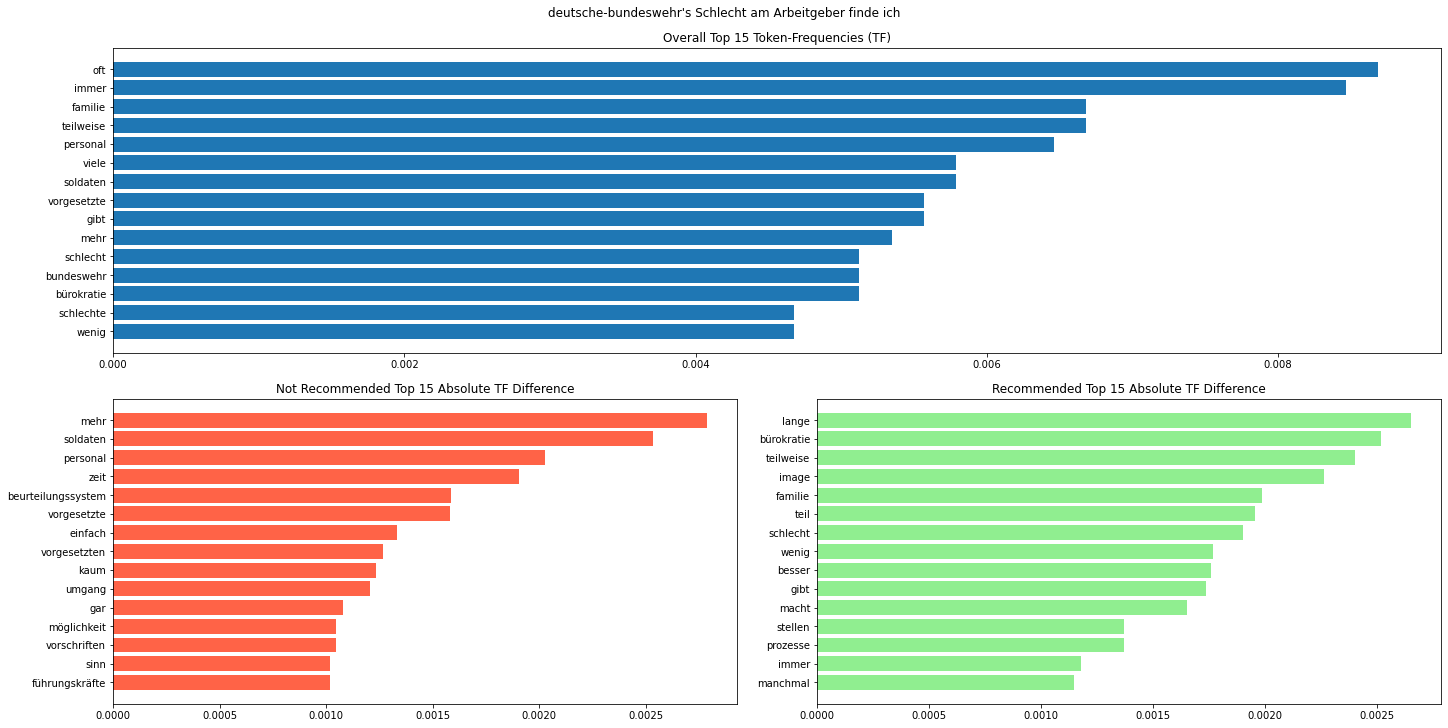

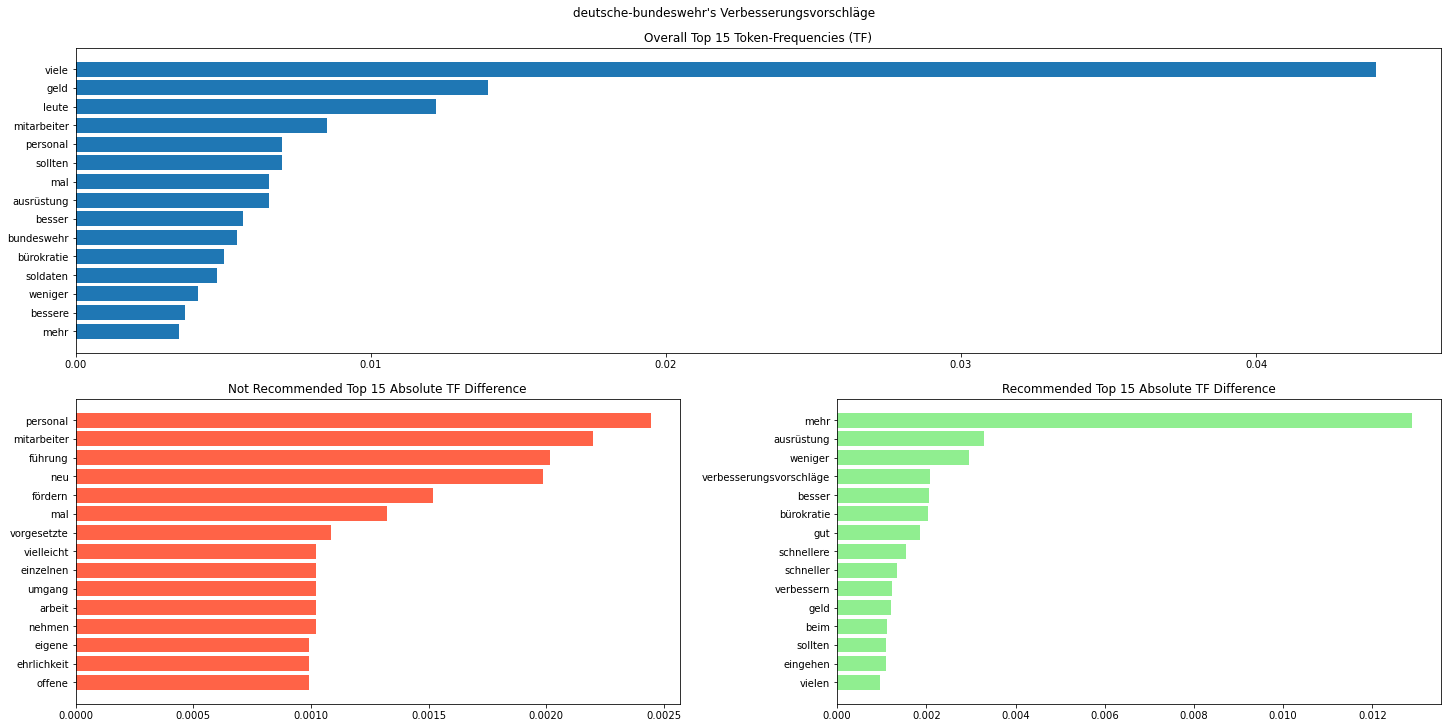

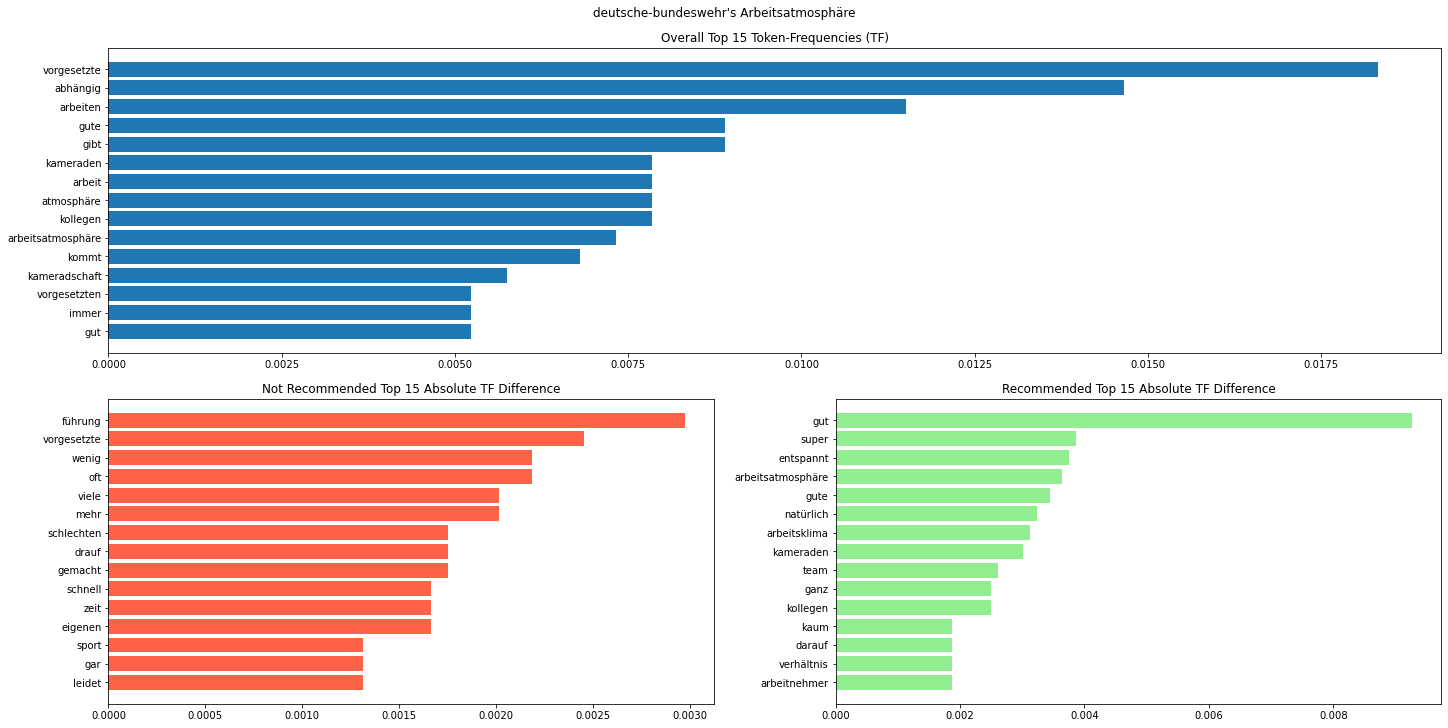

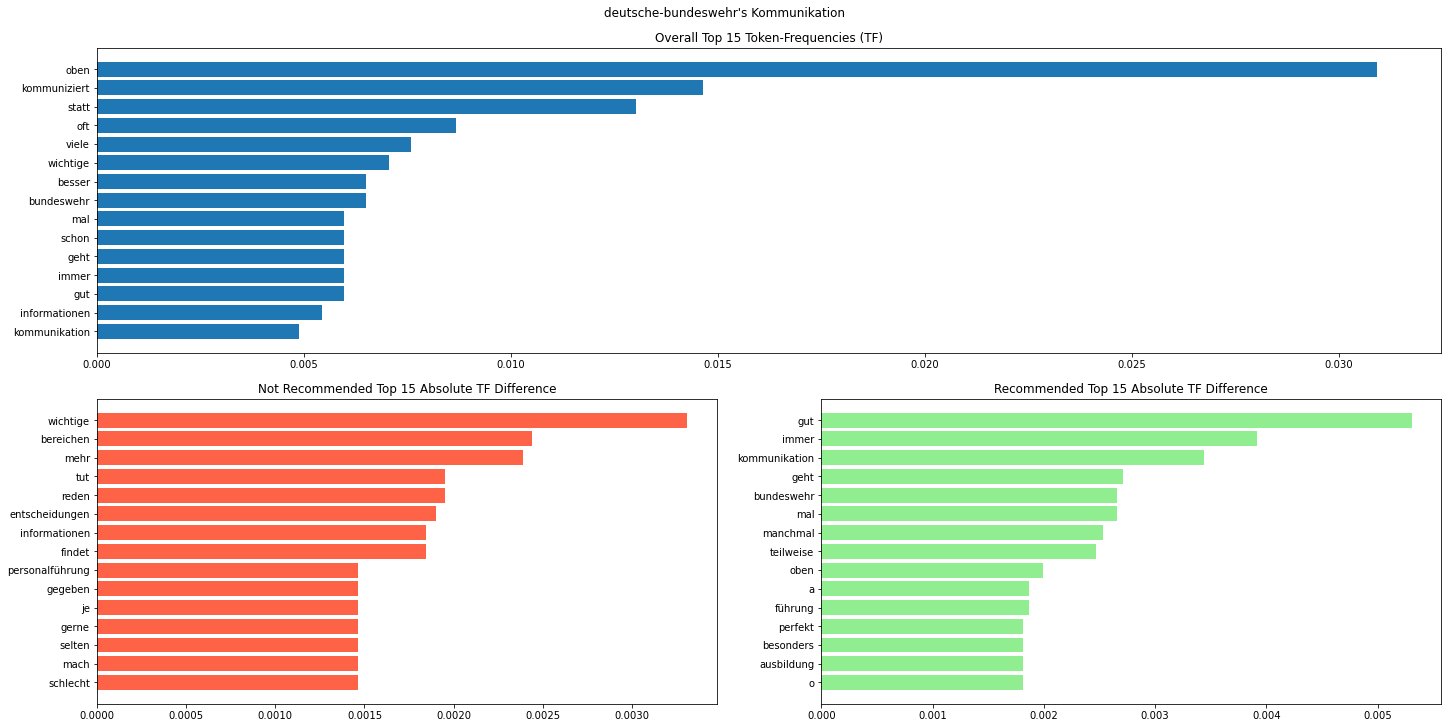

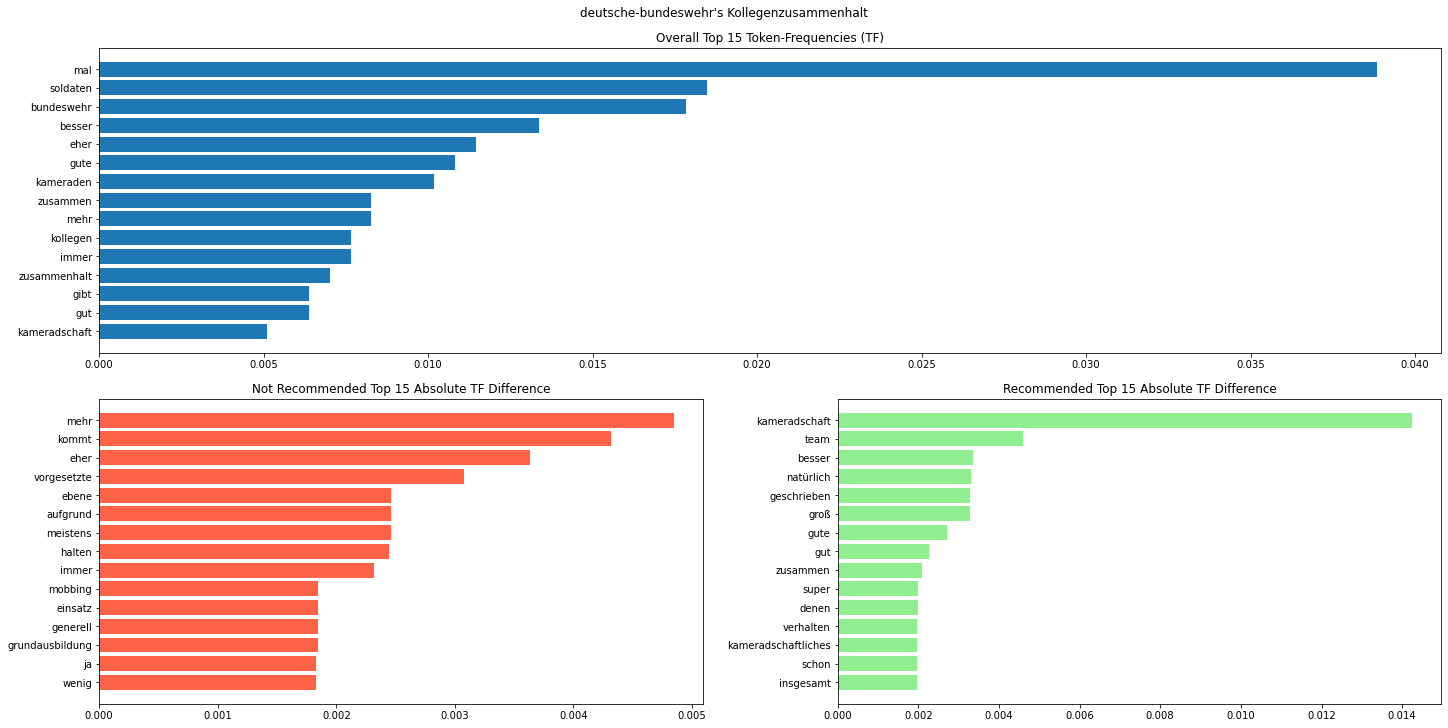

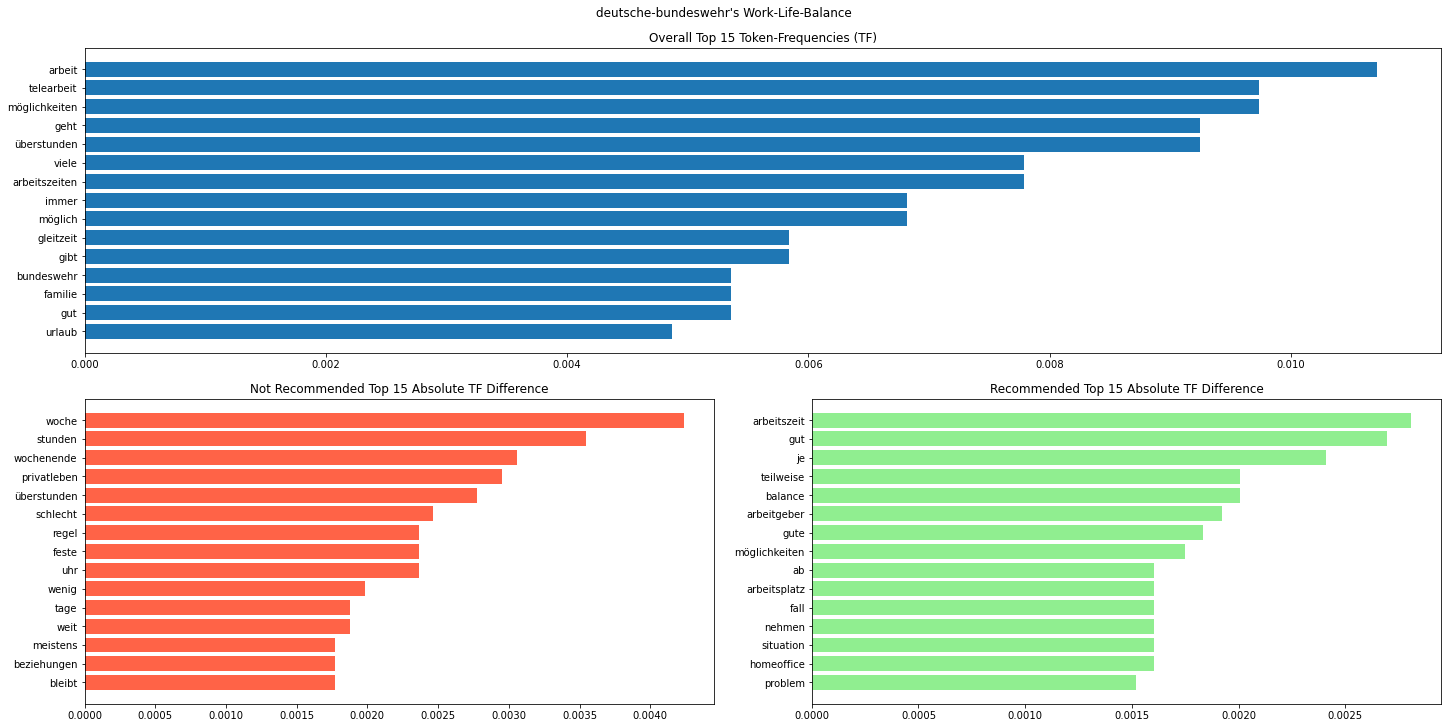

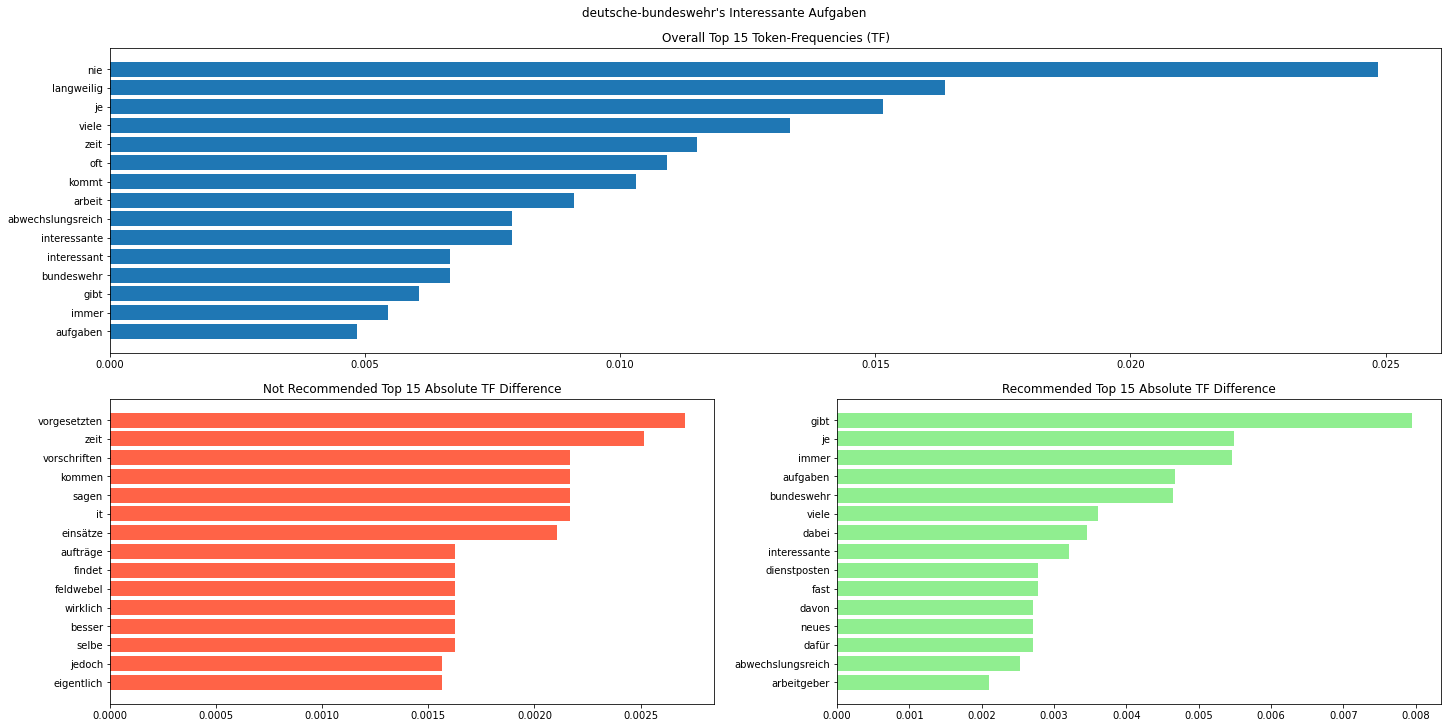

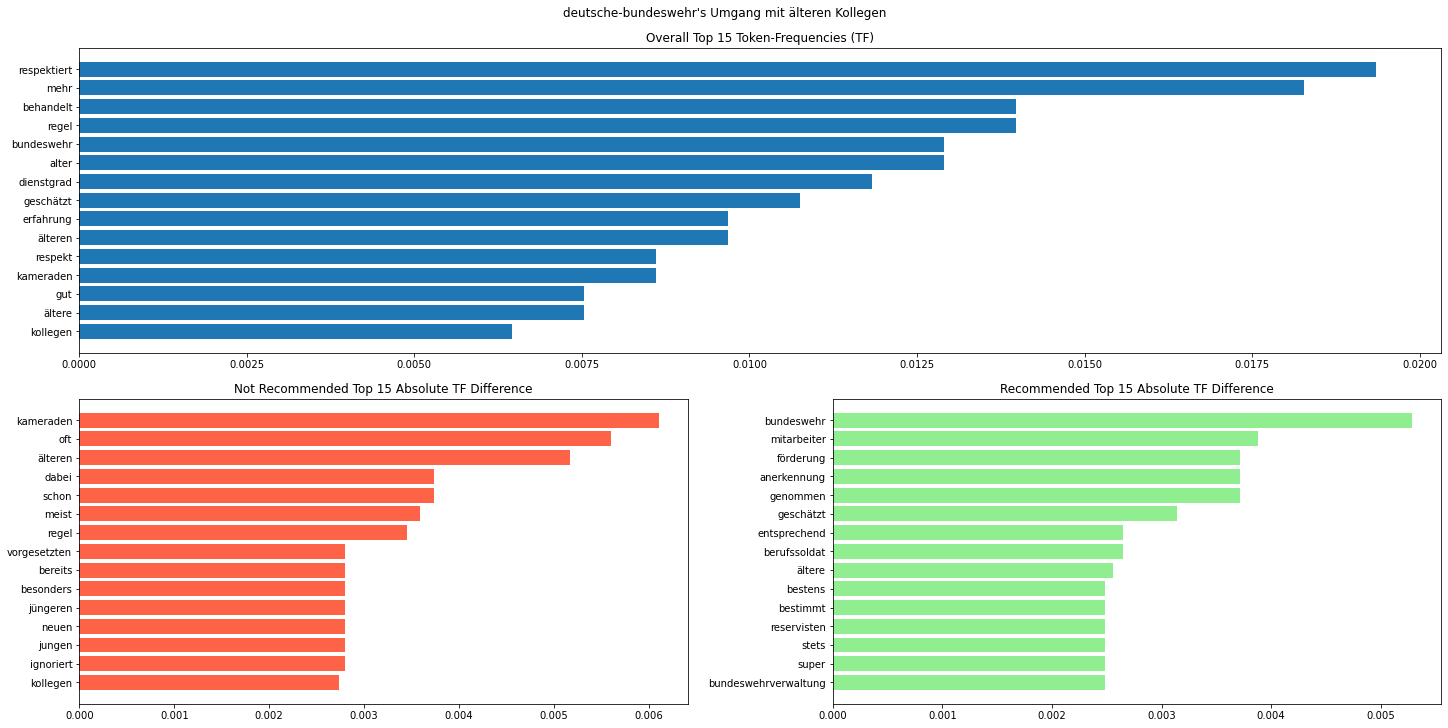

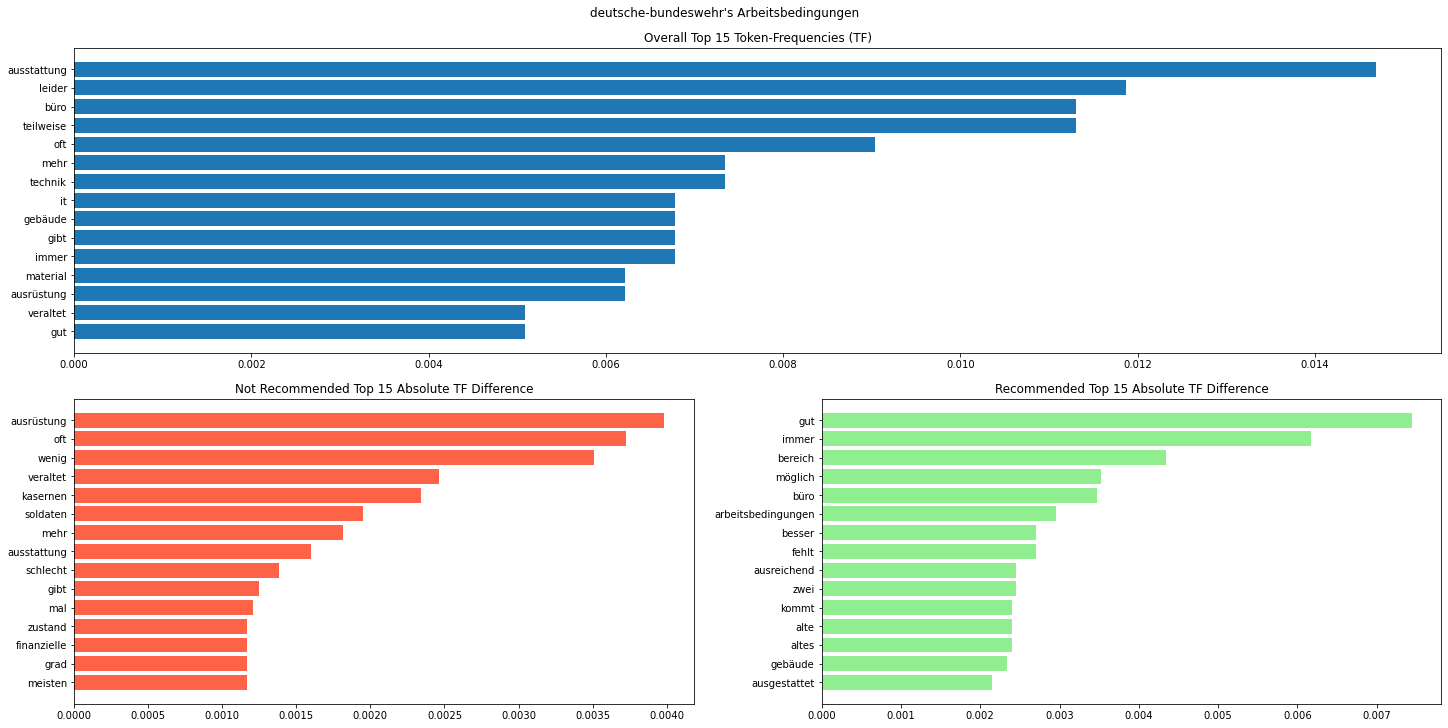

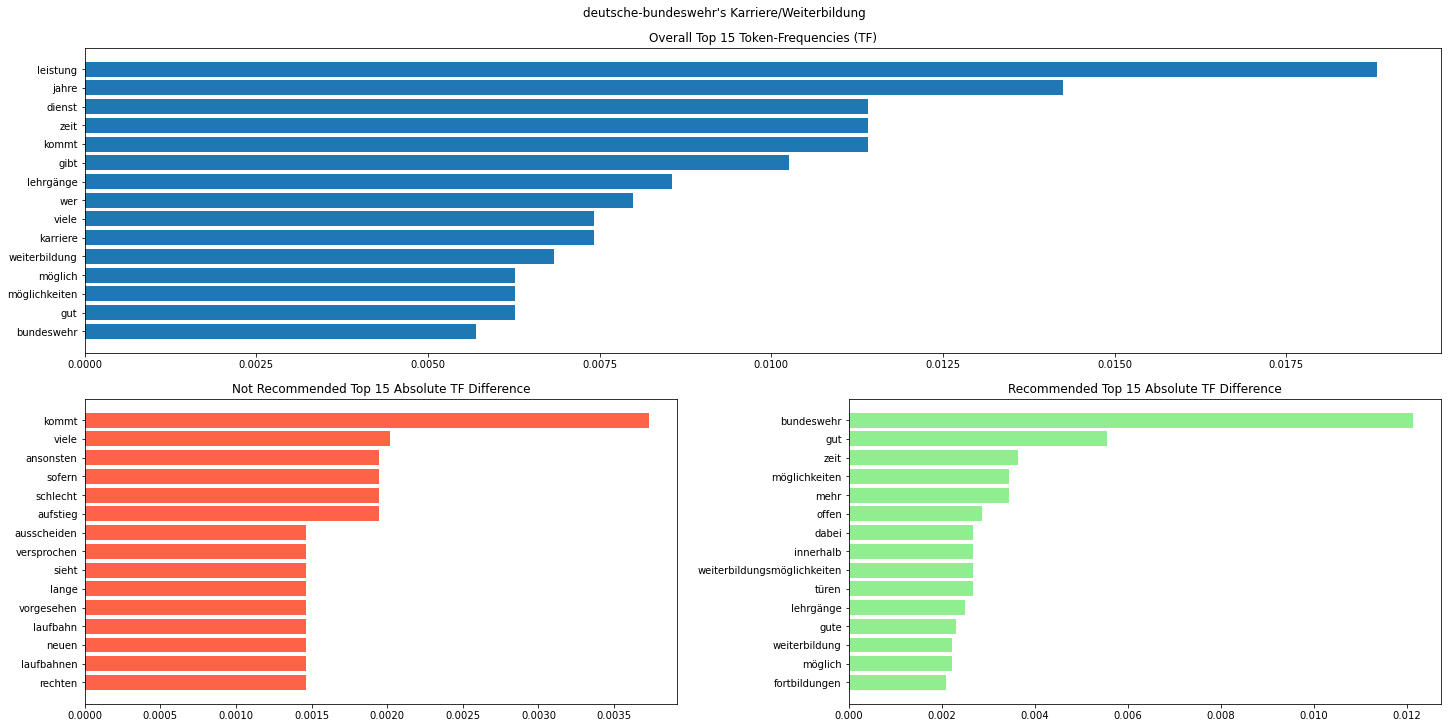

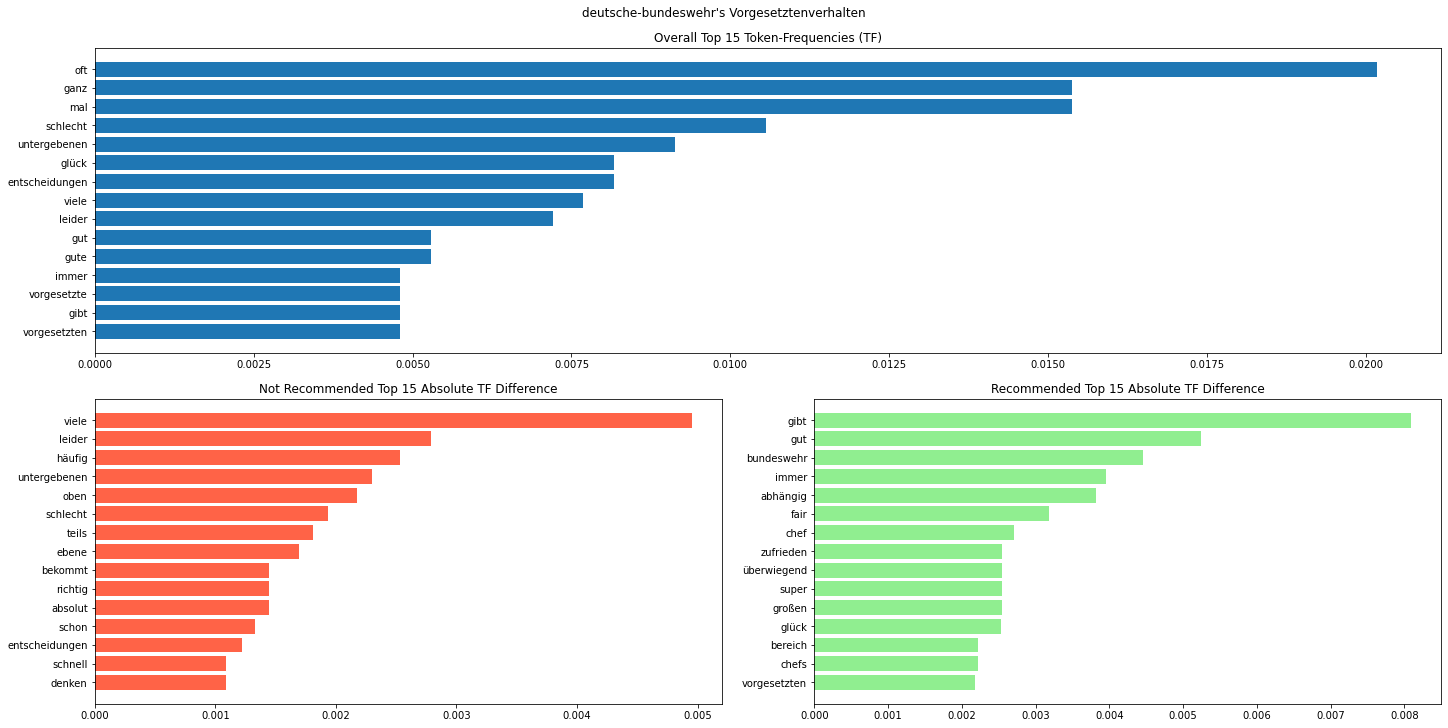

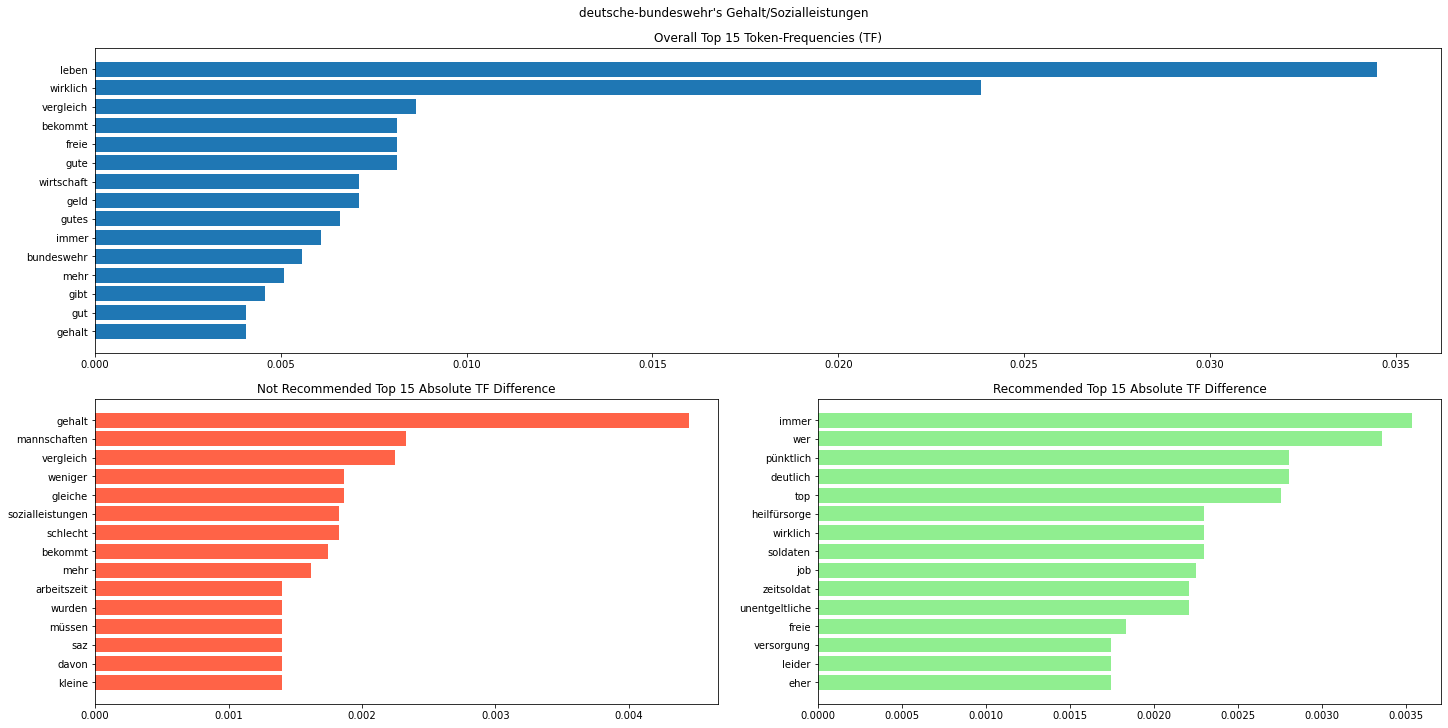

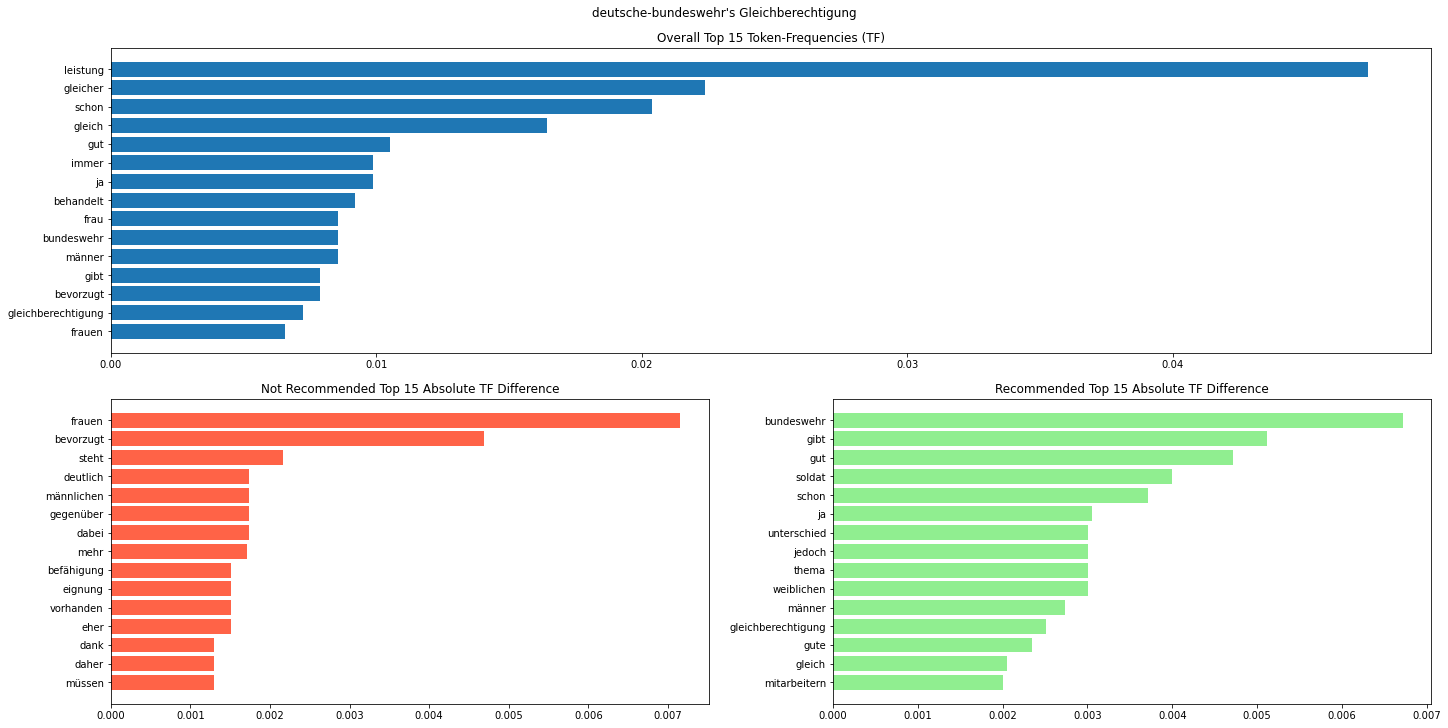

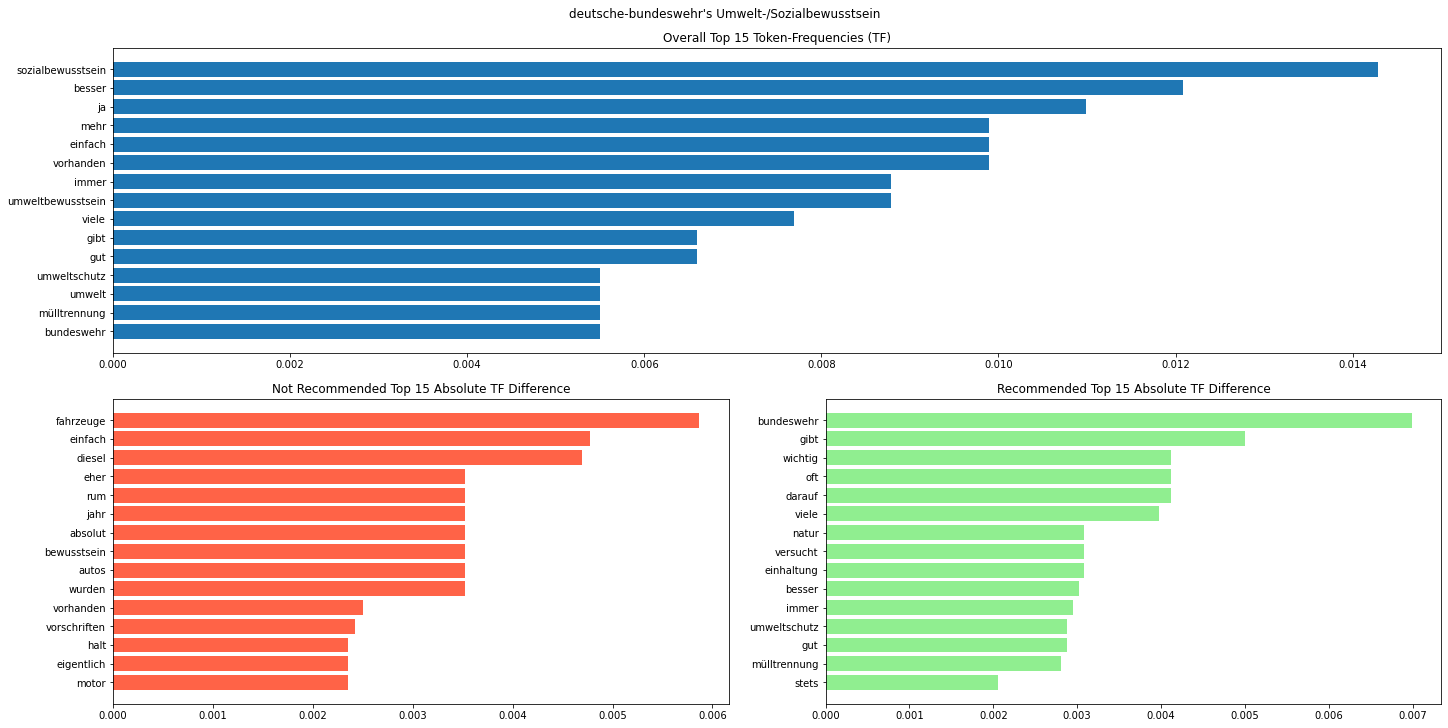

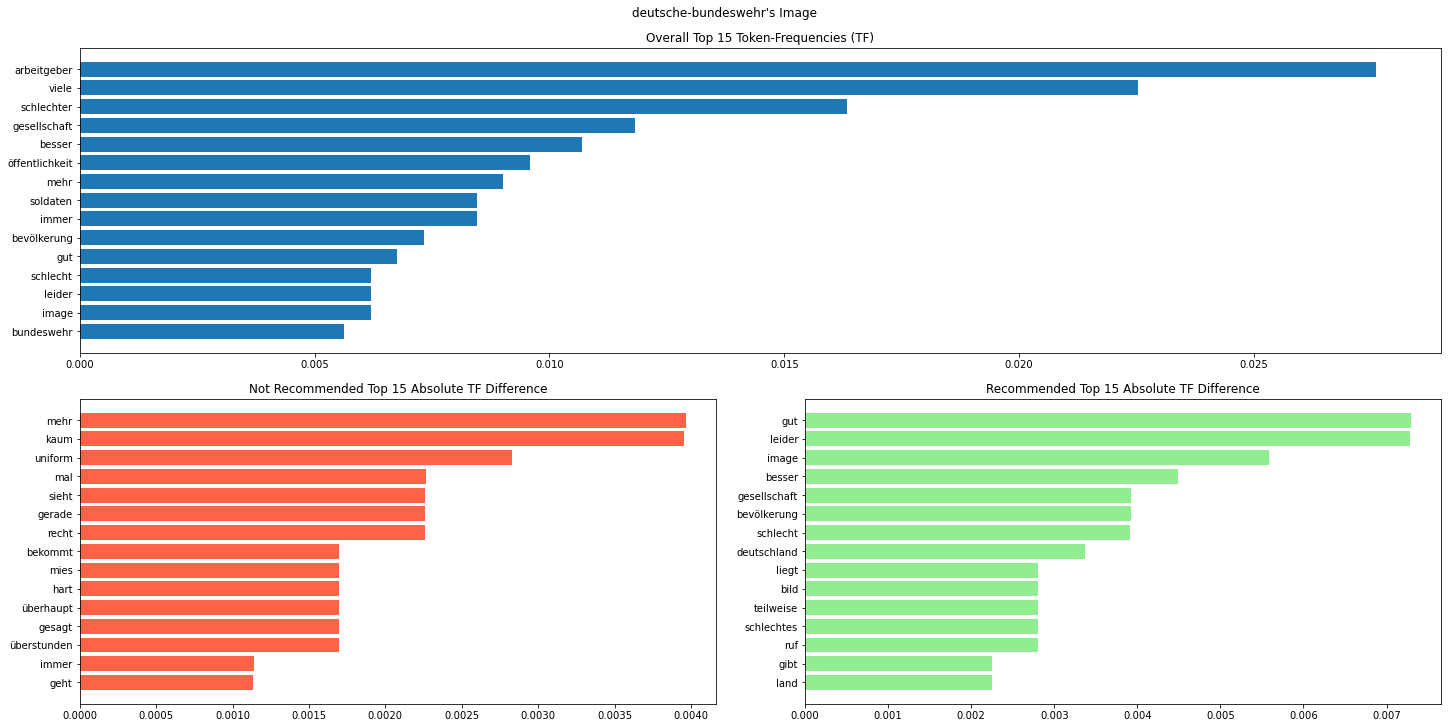

In [55]:
for idx in enough_words:
    # Extract Data
    pluswords  = df_alltext.loc['recom'][idx]
    minuswords = df_alltext.loc['norecom'][idx]
    allwords   = pluswords + minuswords
    # Make Bag of Words
    allwords_Counter = Counter(allwords)
    minus_Counter    = Counter(minuswords)
    plus_Counter     = Counter(pluswords)
    # Calcualte Frequencies
    allall = pd.DataFrame.from_dict(Counter(allwords), orient='index')/len(allwords)
    plus   = pd.DataFrame.from_dict(Counter(pluswords), orient='index')/len(pluswords)
    minus  = pd.DataFrame.from_dict(Counter(minuswords), orient='index')/len(minuswords)
    # Take the 
    look_at_plus  = (plus-allall).sort_values(by = 0, ascending = False).head(15)
    look_at_minus = (minus-allall).sort_values(by = 0, ascending = False).head(15)
    # Set up Multiplot Layout
    fig = plt.figure(constrained_layout = True)
    gs  = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :-1])    
    ax3 = fig.add_subplot(gs[1:, -1])    
    # Create Plots
    ax1.set_title('Overall Top 15 Token-Frequencies (TF)')    
    ax1.barh(y = [idx[0] for idx in allwords_Counter.most_common(15)],
         width = np.array([idx[1] for idx in allwords_Counter.most_common(15)])[::-1]/len(allwords))
    ax2.set_title('Not Recommended Top 15 Absolute TF Difference')
    ax2.barh(y = look_at_minus.index[::-1],
             width = look_at_minus[0][::-1],
             color = "tomato")
    ax3.set_title('Recommended Top 15 Absolute TF Difference')
    ax3.barh(y = look_at_plus.index[::-1],
             width = look_at_plus[0][::-1],
             color = "lightgreen")
    fig.suptitle(target+'\'s '+idx.replace('_T',''))
    plt.show() 

## 04 : Predictive Modeling
<br>
<span style="color: red;">
<b>Next Steps</b><br>
- Write Demonstrator: Enter a Text, Get a Guess if Recom/Not Recom<br>
</span>

## 05 : Conclusion

### 05-01 : Gained Insights

### 05-02 : Future Works
#### General
- Contact platform and check legal, before publishing<br>
<br>

#### 05-02-03 : Data Analysis
- Analysis beyond the Feature: Recommendation<br>
- Text vs No-Text<br>
- Text Length<br>
- Advanced TDIDF Experimentation (Stars vs ReviewCategory vs Review vs Category vs Corpus)<br>
- Try CLD2 for Language Identification<br>
- Automatic Identification of "Grading-Curve"'s (Unsupervised Learning: DBSCAN?)<br>